In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# --- Runtime check ---
import torch

if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    print("✅ GPU runtime active")
    print("GPU Name:", torch.cuda.get_device_name(0))
else:
    DEVICE = torch.device("cpu")
    print("❌ Running on CPU only")


✅ GPU runtime active
GPU Name: Tesla T4


In [ ]:
import os

print("Contents of MyDrive:")
# Check if the directory exists before trying to list its contents
if os.path.exists("/content/drive/MyDrive"):
    print(os.listdir("/content/drive/MyDrive"))
else:
    print("Google Drive MyDrive directory not found. Please ensure Google Drive is mounted correctly.")

Contents of MyDrive:
['Colab Notebooks', 'AI_TraceFinder']


In [ ]:
import os

# Base dataset path in Drive
base_path = "/content/drive/MyDrive/AI_TraceFinder"

# Show all top-level folders inside AI_TraceFinder
print("Main Dataset Folders:")
for folder in os.listdir(base_path):
    print(" -", folder)

# Check inside each category
categories = ["Flatfield", "Official", "Wikipedia", "Tampered images"]

for category in categories:
    category_path = os.path.join(base_path, category)
    if os.path.isdir(category_path):
        print(f"\n=== {category} ===")
        for scanner in os.listdir(category_path):
            print(" 🔹 Scanner:", scanner)

Main Dataset Folders:
 - Official
 - Originals
 - Flatfield
 - Tampered images
 - Wikipedia

=== Flatfield ===
 🔹 Scanner: Canon120-1
 🔹 Scanner: EpsonV39-1
 🔹 Scanner: Canon120-2
 🔹 Scanner: Canon220
 🔹 Scanner: HP
 🔹 Scanner: EpsonV370-2
 🔹 Scanner: EpsonV39-2
 🔹 Scanner: Canon9000-1
 🔹 Scanner: EpsonV550
 🔹 Scanner: EpsonV370-1
 🔹 Scanner: Canon9000-2

=== Official ===
 🔹 Scanner: Canon120-1
 🔹 Scanner: Canon220
 🔹 Scanner: EpsonV370-2
 🔹 Scanner: EpsonV370-1
 🔹 Scanner: Canon9000-2
 🔹 Scanner: Canon120-2
 🔹 Scanner: HP
 🔹 Scanner: EpsonV39-2
 🔹 Scanner: EpsonV550
 🔹 Scanner: Canon9000-1
 🔹 Scanner: EpsonV39-1

=== Wikipedia ===
 🔹 Scanner: EpsonV39-2
 🔹 Scanner: EpsonV550
 🔹 Scanner: EpsonV370-1
 🔹 Scanner: EpsonV39-1
 🔹 Scanner: Canon120-1
 🔹 Scanner: Canon120-2
 🔹 Scanner: Canon220
 🔹 Scanner: Canon9000-1
 🔹 Scanner: Canon9000-2
 🔹 Scanner: EpsonV370-2
 🔹 Scanner: HP

=== Tampered images ===
 🔹 Scanner: Binary masks
 🔹 Scanner: Description
 🔹 Scanner: Original
 🔹 Scanner: Tampere

In [ ]:
import os
from google.colab import drive

# Mount Google Drive (if not already mounted)
drive.mount('/content/drive', force_remount=False)

main_counts = {}  # dictionary to store counts per main folder

def print_tree_counts(path, indent="", top_level=None):
    global main_counts
    items = sorted(os.listdir(path))
    file_count = sum([1 for i in items if os.path.isfile(os.path.join(path, i))])
    print(f"{indent} {os.path.basename(path)}/ ({file_count} files)")

    # track counts for top-level main folders
    if top_level is not None:
        main_counts[top_level] = main_counts.get(top_level, 0) + file_count

    for item in items:
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            # pass top_level = current main folder
            if indent == "":  # first level (Flatfield, Official, etc.)
                print_tree_counts(item_path, indent + "    ", top_level=item)
            else:
                print_tree_counts(item_path, indent + "    ", top_level=top_level)

# ---- Run on your dataset ----
dataset_path = "/content/drive/MyDrive/AI_TraceFinder"
print_tree_counts(dataset_path)

# ---- Print main folder totals ----
print("\n Total files per main folder:")
for folder, count in main_counts.items():
    print(f"   {folder}: {count} files")

print(f"\n Grand Total: {sum(main_counts.values())} files")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 AI_TraceFinder/ (0 files)
     Flatfield/ (0 files)
         Canon120-1/ (2 files)
         Canon120-2/ (2 files)
         Canon220/ (2 files)
         Canon9000-1/ (2 files)
         Canon9000-2/ (2 files)
         EpsonV370-1/ (2 files)
         EpsonV370-2/ (2 files)
         EpsonV39-1/ (3 files)
         EpsonV39-2/ (2 files)
         EpsonV550/ (2 files)
         HP/ (2 files)
     Official/ (0 files)
         Canon120-1/ (0 files)
             150/ (100 files)
             300/ (100 files)
         Canon120-2/ (0 files)
             150/ (100 files)
             300/ (100 files)
         Canon220/ (0 files)
             150/ (100 files)
             300/ (100 files)
         Canon9000-1/ (0 files)
             150/ (100 files)
             300/ (100 files)
         Canon9000-2/ (0 files)
             150/ (100 files)
             300/ (100 files)
    

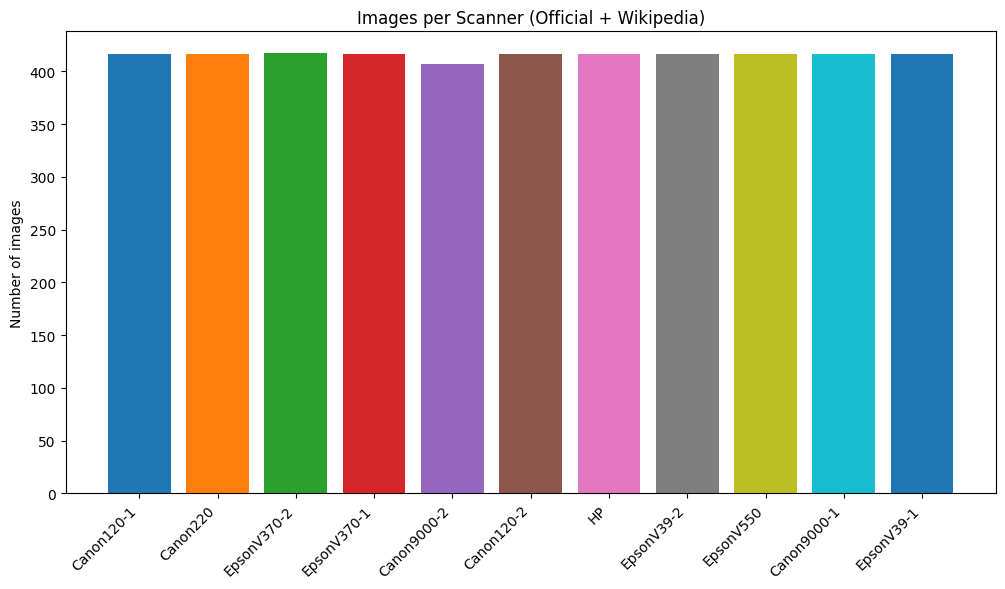

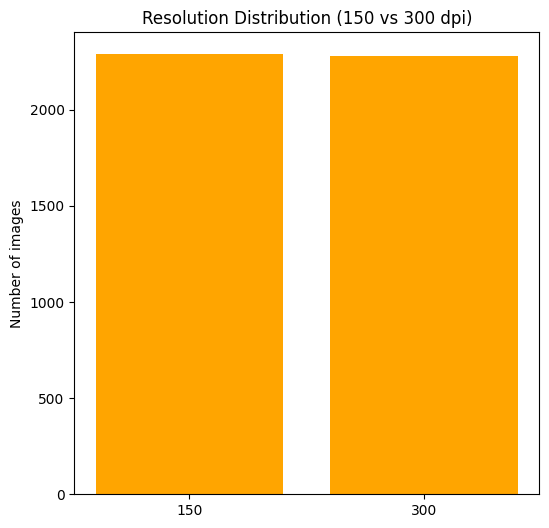

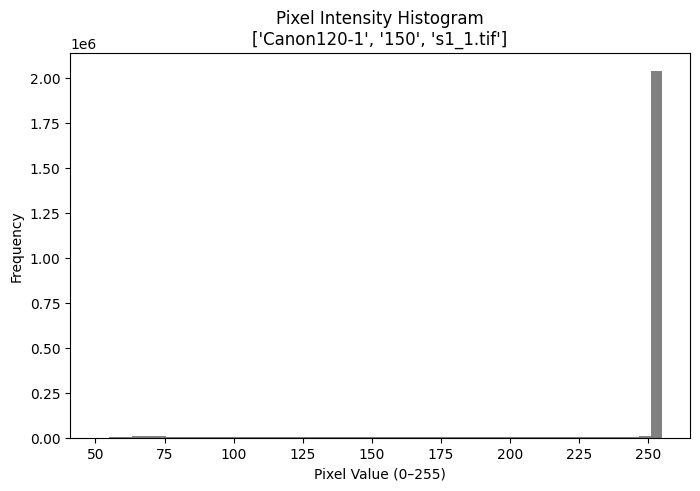

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from collections import defaultdict

# Base path
base_path = "/content/drive/MyDrive/AI_TraceFinder"

# Function to count images per scanner per resolution
def count_images(base, categories=("Official", "Wikipedia")):
    counts = defaultdict(lambda: defaultdict(int))  # scanner -> {res: count}
    for cat in categories:
        cat_path = os.path.join(base, cat)
        for scanner in os.listdir(cat_path):
            scan_path = os.path.join(cat_path, scanner)
            if os.path.isdir(scan_path):
                for res in os.listdir(scan_path):
                    res_path = os.path.join(scan_path, res)
                    if os.path.isdir(res_path):
                        n = len([f for f in os.listdir(res_path) if f.lower().endswith(('.jpg','.png','.tif','.tiff'))])
                        counts[scanner][res] += n
    return counts

# Get counts
scanner_counts = count_images(base_path)

# --- Plot 1: Bar chart per scanner ---
plt.figure(figsize=(12,6))
for scanner, res_dict in scanner_counts.items():
    total = sum(res_dict.values())
    plt.bar(scanner, total)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of images")
plt.title("Images per Scanner (Official + Wikipedia)")
plt.show()

# --- Plot 2: Resolution distribution ---
res_totals = defaultdict(int)
for scanner, res_dict in scanner_counts.items():
    for res, cnt in res_dict.items():
        res_totals[res] += cnt

plt.figure(figsize=(6,6))
plt.bar(res_totals.keys(), res_totals.values(), color='orange')
plt.ylabel("Number of images")
plt.title("Resolution Distribution (150 vs 300 dpi)")
plt.show()

# --- Plot 3: Pixel intensity histogram for one sample ---
sample_img_path = None
for cat in ["Official", "Wikipedia"]:
    cat_path = os.path.join(base_path, cat)
    for scanner in os.listdir(cat_path):
        scan_path = os.path.join(cat_path, scanner)
        if os.path.isdir(scan_path):
            for res in os.listdir(scan_path):
                res_path = os.path.join(scan_path, res)
                if os.path.isdir(res_path):
                    files = [f for f in os.listdir(res_path) if f.lower().endswith(('.jpg','.png','.tif','.tiff'))]
                    if files:
                        sample_img_path = os.path.join(res_path, files[0])
                        break
            if sample_img_path:
                break
    if sample_img_path:
        break

if sample_img_path:
    img = cv2.imread(sample_img_path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(8,5))
    plt.hist(img.ravel(), bins=50, color='gray')
    plt.title(f"Pixel Intensity Histogram\n{sample_img_path.split('/')[-3:]}")  # scanner/res/file
    plt.xlabel("Pixel Value (0–255)")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

# Paths
BASE = "/content/drive/MyDrive/AI_TraceFinder"
OUT  = "/content/drive/MyDrive/AI_TraceFinder_Preprocessed"

# Parameters
SIZE = 224             # resize size
WORKERS = 8             # increase workers for speed
MAX_FILES = None        # limit per folder (None = all)

# Ensure output folder exists
os.makedirs(OUT, exist_ok=True)

def is_image(name):
    return name.lower().endswith((".tif",".tiff",".png",".jpg",".jpeg"))

def process_and_save(src, dst, cat):
    """Load, preprocess, and save one image"""
    img = cv2.imread(src, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return False

    if cat == "Flatfield":
        processed = img   # keep original for PRNU
    else:
        # Resize and convert to uint8 for other categories
        processed = cv2.resize(img, (SIZE, SIZE), interpolation=cv2.INTER_AREA)
        processed = cv2.normalize(processed, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


    os.makedirs(os.path.dirname(dst), exist_ok=True)
    cv2.imwrite(dst, processed)
    return True

def preprocess_category(cat):
    cat_in = os.path.join(BASE, cat)
    cat_out = os.path.join(OUT, cat)
    if not os.path.isdir(cat_in):
        print(f" Missing: {cat}")
        return

    print(f"\n=== Processing {cat} ===")
    futures = []
    with ThreadPoolExecutor(max_workers=WORKERS) as executor:
        for root, _, files in os.walk(cat_in):
            img_files = [f for f in files if is_image(f)]
            if MAX_FILES:
                img_files = img_files[:MAX_FILES]
            for fname in img_files:
                src = os.path.join(root, fname)
                rel = os.path.relpath(src, cat_in)
                dst = os.path.join(cat_out, rel)
                futures.append(executor.submit(process_and_save, src, dst, cat))

        for _ in tqdm(as_completed(futures), total=len(futures), desc=f"{cat}"):
            pass
    print(f" Done {cat}")

# Run all categories
for cat in ["Flatfield", "Official", "Wikipedia", "Tampered images"]:
    preprocess_category(cat)

print("\n FAST preprocessing complete! Check:", OUT)


=== Processing Flatfield ===


Flatfield: 100%|██████████| 23/23 [00:15<00:00,  1.49it/s]


 Done Flatfield

=== Processing Official ===


Official: 100%|██████████| 2200/2200 [20:12<00:00,  1.81it/s]


 Done Official

=== Processing Wikipedia ===


Wikipedia: 100%|██████████| 2368/2368 [23:54<00:00,  1.65it/s]


 Done Wikipedia

=== Processing Tampered images ===


Tampered images: 100%|██████████| 271/271 [02:14<00:00,  2.02it/s]

 Done Tampered images

 FAST preprocessing complete! Check: /content/drive/MyDrive/AI_TraceFinder_Preprocessed


 Built fingerprint for scanner: Canon120-1
 Built fingerprint for scanner: EpsonV39-1
 Built fingerprint for scanner: Canon220
 Built fingerprint for scanner: EpsonV370-2
 Built fingerprint for scanner: Canon120-2
 Built fingerprint for scanner: HP
 Built fingerprint for scanner: EpsonV39-2
 Built fingerprint for scanner: Canon9000-1
 Built fingerprint for scanner: EpsonV550
 Built fingerprint for scanner: Canon9000-2
 Built fingerprint for scanner: EpsonV370-1


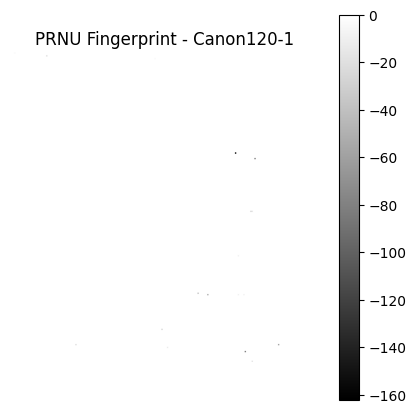

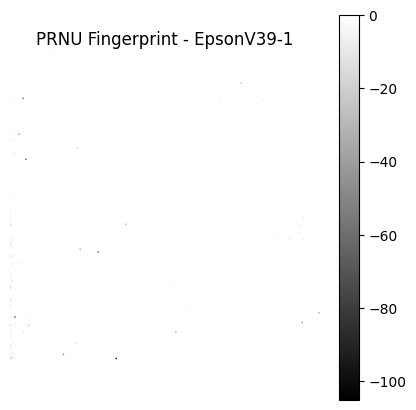

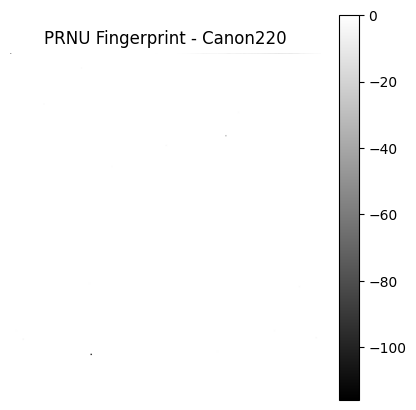

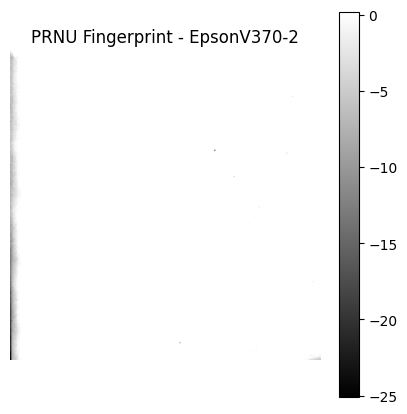

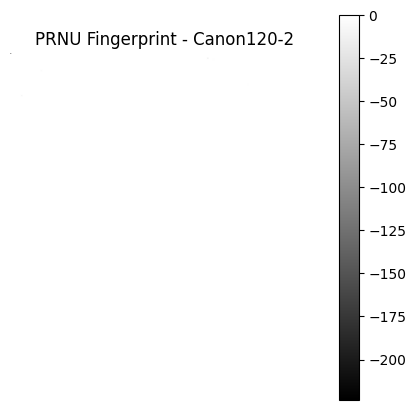

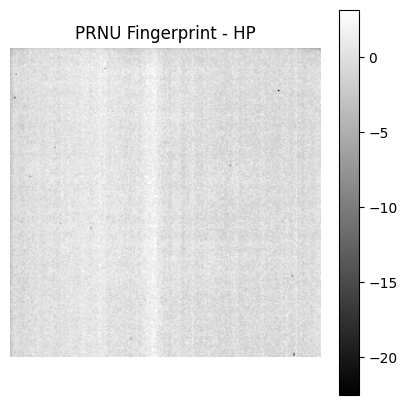

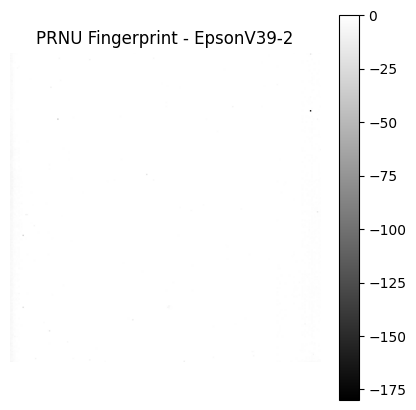

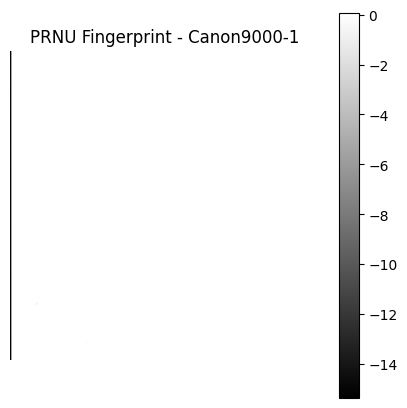

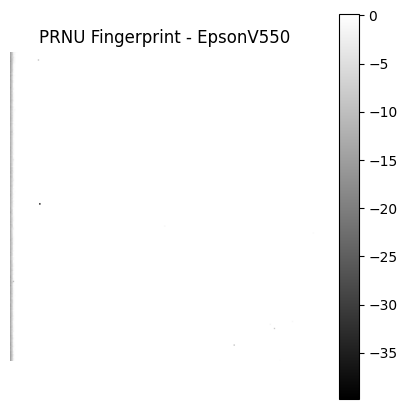

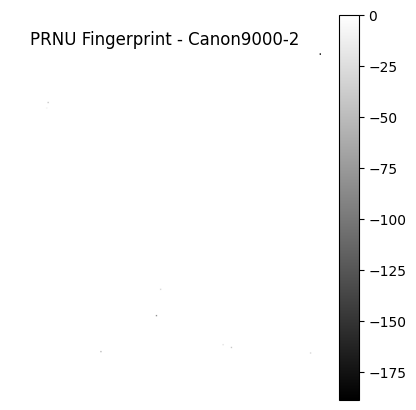

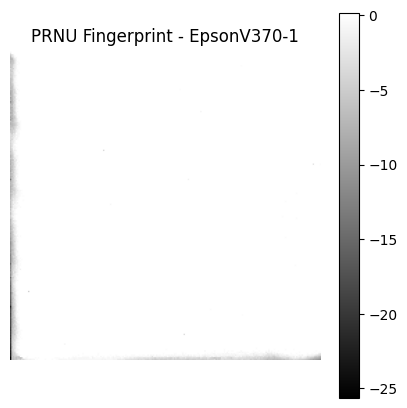


 Fingerprints built for scanners: ['Canon120-1', 'EpsonV39-1', 'Canon220', 'EpsonV370-2', 'Canon120-2', 'HP', 'EpsonV39-2', 'Canon9000-1', 'EpsonV550', 'Canon9000-2', 'EpsonV370-1']


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet

# Paths
PREPROCESSED = "/content/drive/MyDrive/AI_TraceFinder_Preprocessed"
SIZE = 224  # resize size (match your preprocessing)

# --- Residual extractor ---
def extract_residual(img):
    """Extract PRNU residual = image - denoised(image)."""
    den = denoise_wavelet(img, channel_axis=None, mode='soft', rescale_sigma=True)
    resid = img - den
    resid = resid - resid.mean()
    resid = resid / (resid.std() + 1e-8)
    return resid.astype(np.float32)

# --- Build PRNU fingerprints from Flatfield ---
fingerprints = {}
flatfield_path = os.path.join(PREPROCESSED, "Flatfield")

for scanner in os.listdir(flatfield_path):
    scanner_dir = os.path.join(flatfield_path, scanner)
    if not os.path.isdir(scanner_dir):
        continue

    residuals = []
    for fname in os.listdir(scanner_dir):
        if fname.lower().endswith((".tif", ".tiff", ".png", ".jpg", ".jpeg")):
            img = cv2.imread(os.path.join(scanner_dir, fname), cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, (SIZE, SIZE))
            resid = extract_residual(img)
            residuals.append(resid)

    if residuals:
        # Average residuals = PRNU fingerprint
        fingerprint = np.mean(residuals, axis=0)
        # Normalize
        fingerprint = (fingerprint - fingerprint.mean()) / (fingerprint.std() + 1e-8)
        fingerprints[scanner] = fingerprint
        np.save(os.path.join(PREPROCESSED, f"fingerprint_{scanner}.npy"), fingerprint)
        print(f" Built fingerprint for scanner: {scanner}")

# This block was incorrectly indented
for scanner, fp in fingerprints.items():
    plt.figure(figsize=(5,5))
    plt.imshow(fp, cmap="gray")
    plt.title(f"PRNU Fingerprint - {scanner}")
    plt.axis("off")
    plt.colorbar()
    plt.show()


print("\n Fingerprints built for scanners:", list(fingerprints.keys()))

In [ ]:
import os
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

# === Paths ===
base_path = "/content/drive/MyDrive/AI_TraceFinder_Preprocessed"
output_path = "/content/drive/MyDrive/AI_TraceFinder_PRNU"
os.makedirs(output_path, exist_ok=True)

def extract_prnu(img):
    """Extract PRNU fingerprint using wavelet denoising residual."""
    coeffs = pywt.dwt2(img, 'db2')
    cA, (cH, cV, cD) = coeffs
    cA.fill(0)  # keep only noise details
    residual = pywt.idwt2((cA, (cH, cV, cD)), 'db2')
    return residual

# Process categories
for category in ["Flatfield", "Official", "Wikipedia"]:
    cat_in = os.path.join(base_path, category)
    if not os.path.isdir(cat_in):
        print(f" Skipping missing category: {category}")
        continue

    print(f"\n=== Extracting PRNU for {category} ===")
    for scanner in os.listdir(cat_in):
        scanner_path = os.path.join(cat_in, scanner)
        if not os.path.isdir(scanner_path):
            continue

        for sub in os.listdir(scanner_path):  # DPI folders
            sub_path = os.path.join(scanner_path, sub)
            if os.path.isdir(sub_path):
                out_dir = os.path.join(output_path, category, scanner, sub)
                os.makedirs(out_dir, exist_ok=True)

                shown_example = False
                for file in os.listdir(sub_path):
                    if file.lower().endswith(('.tif', '.tiff', '.jpg', '.png')):
                        img_path = os.path.join(sub_path, file)
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is None:
                            continue

                        # Extract PRNU
                        residual = extract_prnu(img)
                        residual = (residual - residual.mean()) / (residual.std() + 1e-12)

                        # Save as .npy (for ML)
                        base = os.path.splitext(file)[0]
                        np.save(os.path.join(out_dir, f"{base}_prnu.npy"), residual.astype(np.float32))

                        # Save normalized .png (for preview)
                        residual_norm = cv2.normalize(residual, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
                        cv2.imwrite(os.path.join(out_dir, f"{base}_prnu.png"), residual_norm)

                        # Show one example in Colab
                        if not shown_example:
                            plt.figure(figsize=(10,4))
                            plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title(f"{category} | {scanner} | {sub}\nOriginal")
                            plt.subplot(1,2,2); plt.imshow(residual_norm, cmap='gray'); plt.title(f"{category} | {scanner} | {sub}\nPRNU")
                            plt.show()
                            shown_example = True

            # Handle Flatfield files directly (if no dpi folder)
            elif category == "Flatfield" and sub.lower().endswith(('.tif', '.tiff', '.jpg', '.png')):
                img_path = os.path.join(scanner_path, sub)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    continue

                residual = extract_prnu(img)
                residual = (residual - residual.mean()) / (residual.std() + 1e-12)

                # Save both .npy and .png
                out_dir = os.path.join(output_path, category, scanner)
                os.makedirs(out_dir, exist_ok=True)
                base = os.path.splitext(sub)[0]
                np.save(os.path.join(out_dir, f"{base}_prnu.npy"), residual.astype(np.float32))
                residual_norm = cv2.normalize(residual, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
                cv2.imwrite(os.path.join(out_dir, f"{base}_prnu.png"), residual_norm)

                # Show preview
                plt.figure(figsize=(10,4))
                plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title(f"{category} | {scanner}\nOriginal")
                plt.subplot(1,2,2); plt.imshow(residual_norm, cmap='gray'); plt.title(f"{category} | {scanner}\nPRNU")
                plt.show()

In [ ]:
import os
import cv2
import numpy as np
import pywt
from tqdm import tqdm

# Paths
base_path = "/content/drive/MyDrive/AI_TraceFinder_Preprocessed"
output_path = "/content/drive/MyDrive/AI_TraceFinder_PRNU"
os.makedirs(output_path, exist_ok=True)

def extract_prnu(img):
    coeffs = pywt.dwt2(img, 'db2')
    cA, (cH, cV, cD) = coeffs
    cA.fill(0)
    residual = pywt.idwt2((cA, (cH, cV, cD)), 'db2')
    residual = (residual - residual.mean()) / (residual.std() + 1e-12)
    return residual.astype(np.float32)

for category in ["Official", "Wikipedia"]:
    cat_in = os.path.join(base_path, category)
    if not os.path.isdir(cat_in):
        print(f"⚠️ Skipping missing {category}")
        continue

    for scanner in os.listdir(cat_in):
        scanner_path = os.path.join(cat_in, scanner)
        if not os.path.isdir(scanner_path): continue

        out_dir = os.path.join(output_path, category, scanner)
        os.makedirs(out_dir, exist_ok=True)

        for fname in tqdm(os.listdir(scanner_path), desc=f"{category}/{scanner}"):
            if fname.lower().endswith((".tif", ".tiff", ".jpg", ".png", ".jpeg")):
                # Rest of the processing logic for each file would go here
                pass # Added a pass statement to make the code syntactically correct for now.

Wikipedia/HP/150: 100%|██████████| 108/108 [00:02<00:00, 36.08it/s]


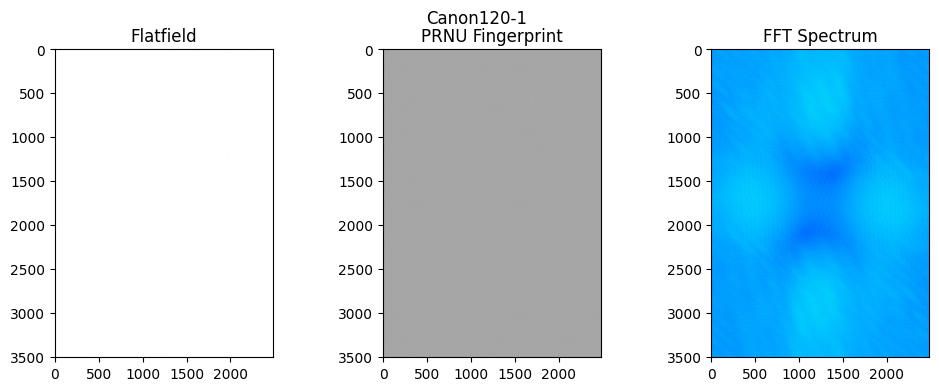

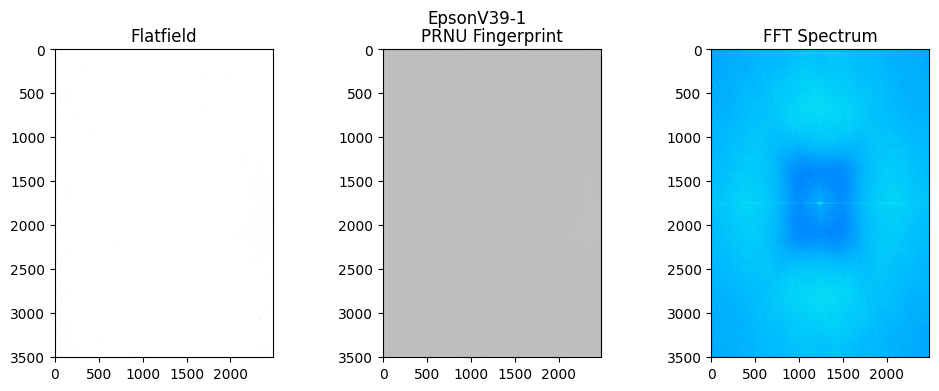

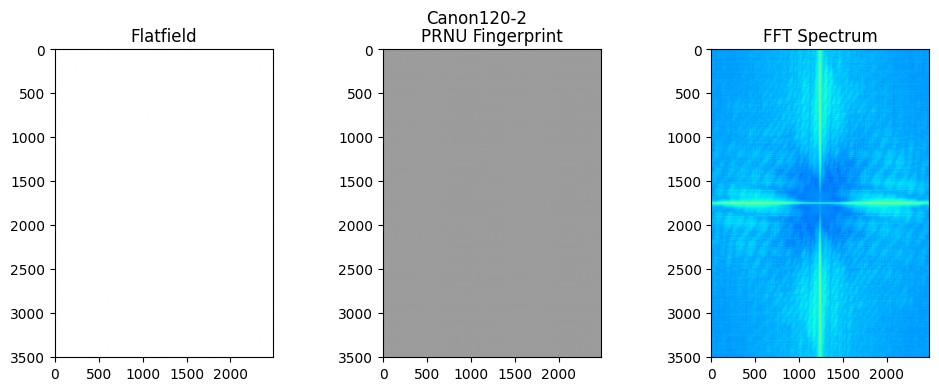

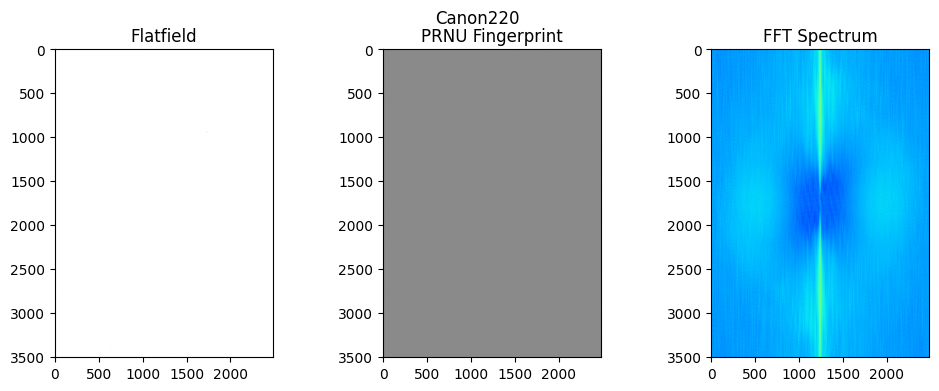

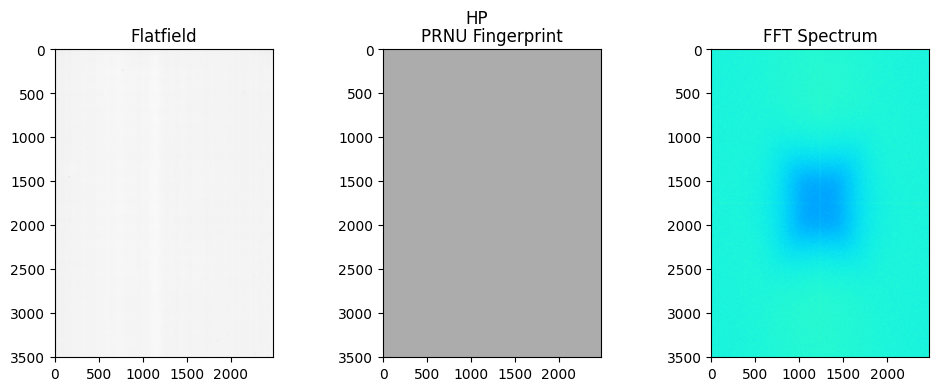

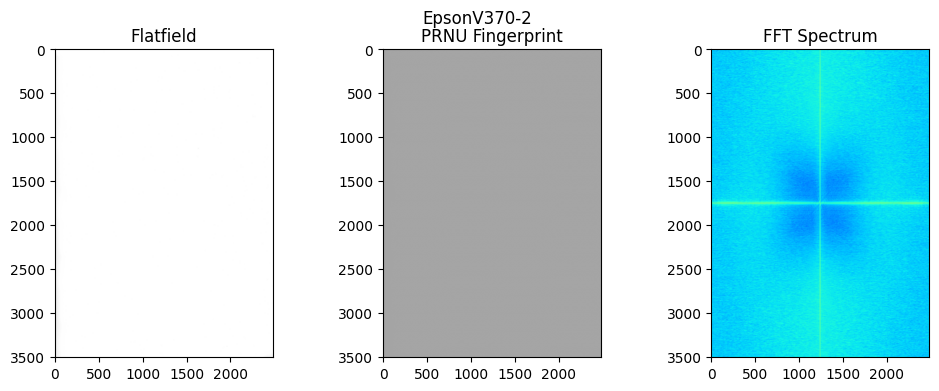

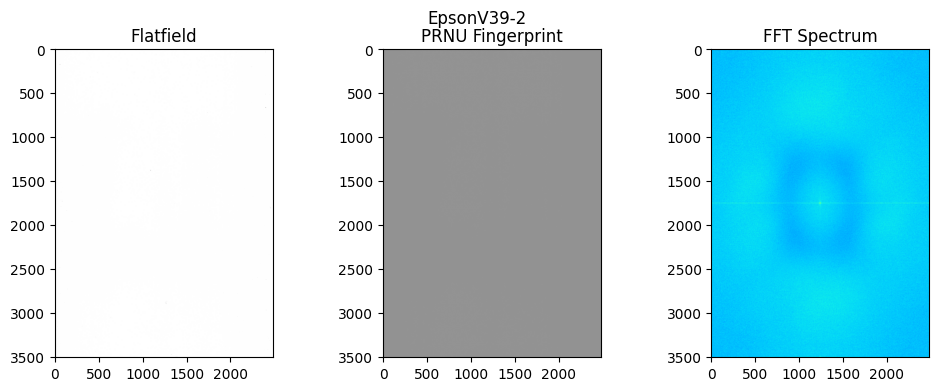

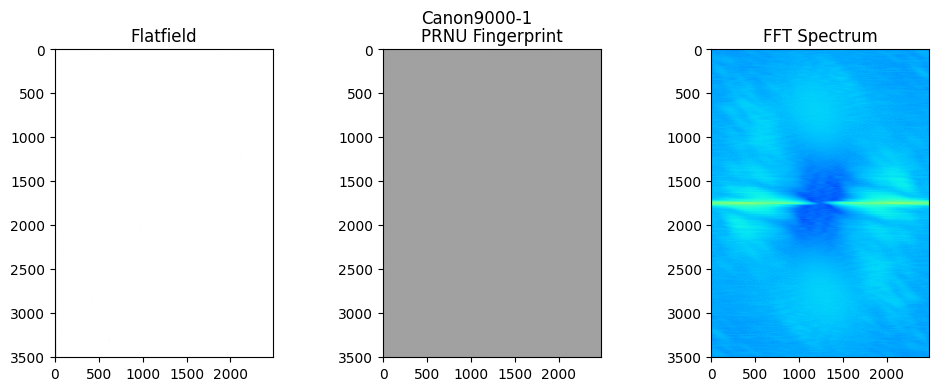

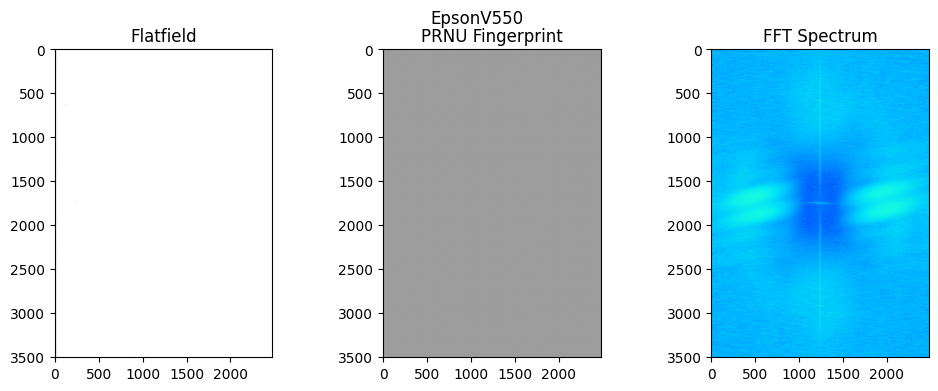

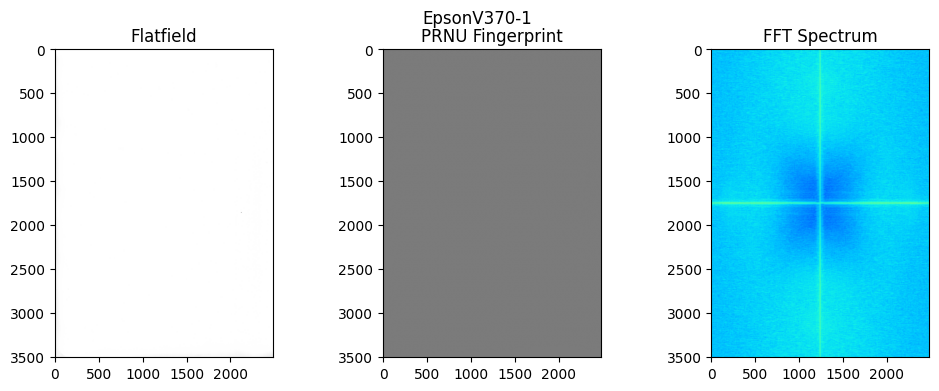

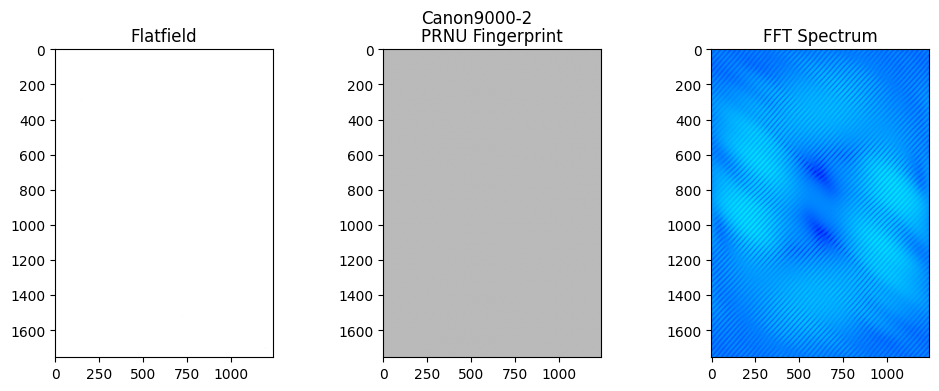

 PRNU + FFT completed! Results saved in:
 - PRNU: /content/drive/MyDrive/AI_TraceFinder_PRNU/Flatfield
 - FFT: /content/drive/MyDrive/AI_TraceFinder_FFT/Flatfield


In [ ]:
import os
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Paths
base_path   = "/content/drive/MyDrive/AI_TraceFinder/Flatfield"
output_prnu = "/content/drive/MyDrive/AI_TraceFinder_PRNU/Flatfield"
output_fft  = "/content/drive/MyDrive/AI_TraceFinder_FFT/Flatfield"

os.makedirs(output_prnu, exist_ok=True)
os.makedirs(output_fft, exist_ok=True)

def extract_prnu(img):
    """Extract PRNU fingerprint using wavelet denoising residual."""
    coeffs = pywt.dwt2(img, 'db2')
    cA, (cH, cV, cD) = coeffs
    cA.fill(0)  # keep only noise details
    residual = pywt.idwt2((cA, (cH, cV, cD)), 'db2')
    residual = (residual - residual.mean()) / (residual.std() + 1e-12)
    return residual.astype(np.float32)

def compute_fft(img):
    """Compute FFT magnitude spectrum."""
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return magnitude_spectrum

# Loop through scanners
for scanner in os.listdir(base_path):
    scanner_path = os.path.join(base_path, scanner)
    if os.path.isdir(scanner_path):
        for file in os.listdir(scanner_path):
            if file.lower().endswith(('.tif', '.tiff', '.jpg', '.png')):
                img_path = os.path.join(scanner_path, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    continue

                # === PRNU Extraction ===
                residual = extract_prnu(img)

                # Save .npy (for ML) + normalized .png (for preview)
                out_dir_prnu = os.path.join(output_prnu, scanner)
                os.makedirs(out_dir_prnu, exist_ok=True)
                base = os.path.splitext(file)[0]
                np.save(os.path.join(out_dir_prnu, f"{base}_prnu.npy"), residual)

                residual_norm = cv2.normalize(residual, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
                cv2.imwrite(os.path.join(out_dir_prnu, f"{base}_prnu.png"), residual_norm)

                # === FFT Spectrum ===
                fft_img = compute_fft(residual_norm)
                out_dir_fft = os.path.join(output_fft, scanner)
                os.makedirs(out_dir_fft, exist_ok=True)
                np.save(os.path.join(out_dir_fft, f"{base}_fft.npy"), fft_img)

                # === Visualization (one example per scanner) ===
                plt.figure(figsize=(12,4))
                plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Flatfield")
                plt.subplot(1,3,2); plt.imshow(residual_norm, cmap='gray'); plt.title("PRNU Fingerprint")
                plt.subplot(1,3,3); plt.imshow(fft_img, cmap='jet'); plt.title("FFT Spectrum")
                plt.suptitle(scanner)
                plt.show()
                break  # only show one example per scanner

print(" PRNU + FFT completed! Results saved in:")
print(" - PRNU:", output_prnu)
print(" - FFT:", output_fft)


In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import cv2

# Paths
PRNU_BASE = "/content/drive/MyDrive/AI_TraceFinder_PRNU"
FP_DIR    = os.path.join(PRNU_BASE, "Flatfield")   # fingerprints dir
OUT_CSV   = "/content/drive/MyDrive/AI_TraceFinder_features.csv"

# === Load fingerprints (recursive search) ===
fingerprints = {}
for root, _, files in os.walk(FP_DIR):
    for f in files:
        if f.endswith("_prnu.npy"):   # match your files (150_prnu.npy, 300_prnu.npy)
            fpath = os.path.join(root, f)
            scanner = os.path.basename(root)  # e.g. EpsonV39-1
            dpi = f.split("_")[0]             # "150" or "300"
            key = f"{scanner}_{dpi}"
            fingerprints[key] = np.load(fpath)

print(f" Loaded {len(fingerprints)} fingerprints: {list(fingerprints.keys())[:5]} ...")

# === Feature functions ===
def corr_score(a, b):
    """Normalized correlation between two residuals, resizing if needed."""
    if a.shape != b.shape:
        b = cv2.resize(b, (a.shape[1], a.shape[0]), interpolation=cv2.INTER_AREA)
    a = a.ravel(); b = b.ravel()
    a0, b0 = a - a.mean(), b - b.mean()
    return float(np.dot(a0, b0) / (np.linalg.norm(a0) * np.linalg.norm(b0) + 1e-12))

def fft_features(res):
    """FFT-based features: mean, std, energy, skew, kurtosis"""
    F = np.fft.fft2(res)
    Fm = np.abs(np.fft.fftshift(F))
    return [
        float(Fm.mean()),
        float(Fm.std()),
        float((Fm**2).sum()),    # energy
        float(skew(Fm.ravel())),
        float(kurtosis(Fm.ravel()))
    ]

# === Extract features from Official + Wikipedia ===
rows = []
for category in ["Official", "Wikipedia"]:
    cat_dir = os.path.join(PRNU_BASE, category)
    if not os.path.isdir(cat_dir):
        continue

    for scanner in os.listdir(cat_dir):
        scanner_path = os.path.join(cat_dir, scanner)
        if not os.path.isdir(scanner_path):
            continue

        for dpi in os.listdir(scanner_path):
            dpi_path = os.path.join(scanner_path, dpi)
            if not os.path.isdir(dpi_path):
                continue

            for fname in os.listdir(dpi_path):
                if fname.endswith("_prnu.npy"):
                    fpath = os.path.join(dpi_path, fname)
                    res = np.load(fpath)

                    # 1) Correlation features
                    corr_feats = [corr_score(res, fp) for fp in fingerprints.values()]

                    # 2) FFT features
                    fft_feats = fft_features(res)

                    # 3) Label = scanner
                    label = scanner

                    rows.append(corr_feats + fft_feats + [label])

# === Save as CSV ===
col_corr = [f"corr_{k}" for k in fingerprints.keys()]
col_fft = ["fft_mean","fft_std","fft_energy","fft_skew","fft_kurtosis"]
cols = col_corr + col_fft + ["label"]

df = pd.DataFrame(rows, columns=cols)
df.to_csv(OUT_CSV, index=False)
print(f" Features saved to {OUT_CSV}, shape={df.shape}")

 Loaded 22 fingerprints: ['Canon120-1_150', 'Canon120-1_300', 'EpsonV39-1_150', 'EpsonV39-1_300', 'Canon220_150'] ...
 Features saved to /content/drive/MyDrive/AI_TraceFinder_features.csv, shape=(4568, 28)


Classes: ['Canon120-1' 'Canon120-2' 'Canon220' 'Canon9000-1' 'Canon9000-2'
 'EpsonV370-1' 'EpsonV370-2' 'EpsonV39-1' 'EpsonV39-2' 'EpsonV550' 'HP']

🔹 Logistic Regression
              precision    recall  f1-score   support

  Canon120-1       0.17      0.14      0.15        83
  Canon120-2       0.12      0.06      0.08        83
    Canon220       0.33      0.45      0.38        83
 Canon9000-1       0.43      0.48      0.46        83
 Canon9000-2       0.20      0.12      0.15        82
 EpsonV370-1       0.64      0.45      0.52        83
 EpsonV370-2       0.70      0.71      0.71        84
  EpsonV39-1       0.16      0.14      0.15        83
  EpsonV39-2       0.29      0.55      0.38        84
   EpsonV550       0.62      0.53      0.57        83
          HP       0.56      0.64      0.60        83

    accuracy                           0.39       914
   macro avg       0.38      0.39      0.38       914
weighted avg       0.38      0.39      0.38       914



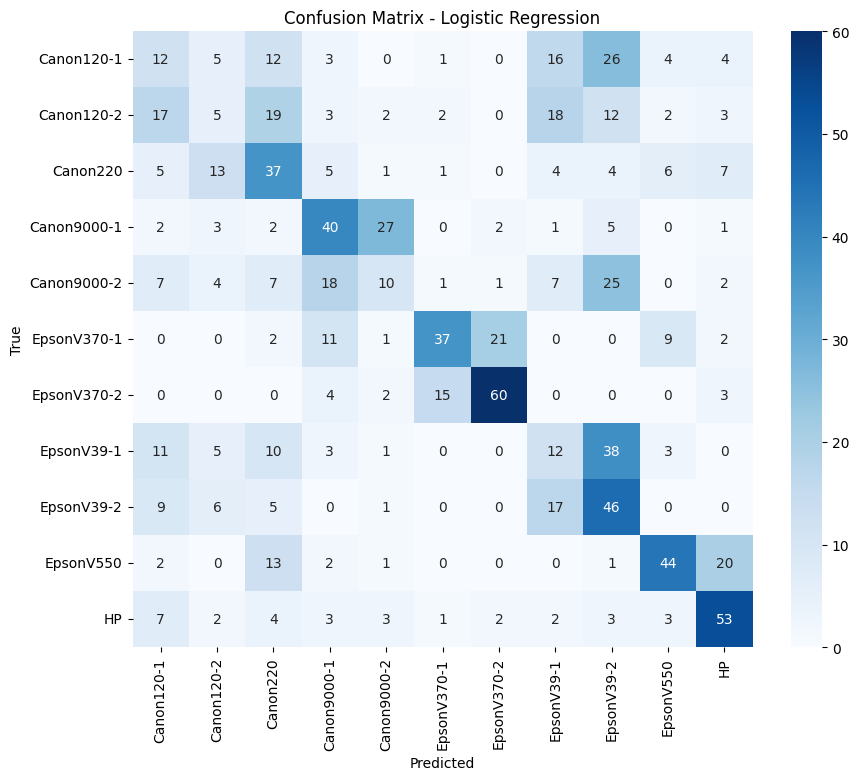


🔹 SVM (RBF Kernel)
              precision    recall  f1-score   support

  Canon120-1       0.19      0.17      0.18        83
  Canon120-2       0.19      0.14      0.16        83
    Canon220       0.43      0.42      0.42        83
 Canon9000-1       0.36      0.41      0.38        83
 Canon9000-2       0.25      0.15      0.18        82
 EpsonV370-1       0.57      0.59      0.58        83
 EpsonV370-2       0.71      0.65      0.68        84
  EpsonV39-1       0.16      0.14      0.15        83
  EpsonV39-2       0.29      0.50      0.37        84
   EpsonV550       0.63      0.83      0.72        83
          HP       0.67      0.49      0.57        83

    accuracy                           0.41       914
   macro avg       0.41      0.41      0.40       914
weighted avg       0.41      0.41      0.40       914



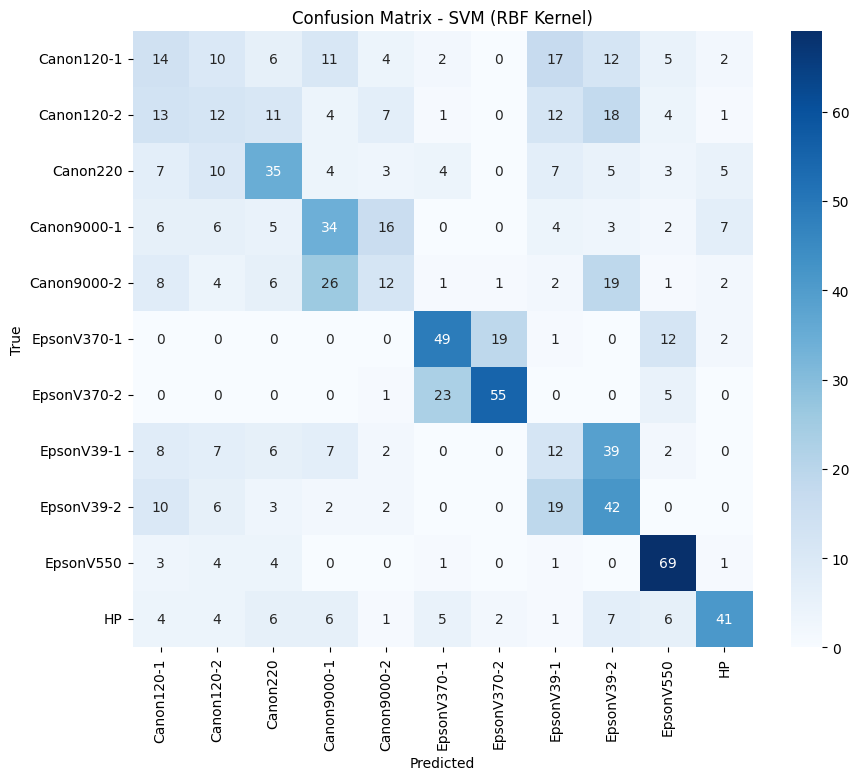


🔹 Random Forest
              precision    recall  f1-score   support

  Canon120-1       0.57      0.52      0.54        83
  Canon120-2       0.76      0.63      0.69        83
    Canon220       0.72      0.75      0.73        83
 Canon9000-1       0.80      0.81      0.80        83
 Canon9000-2       0.66      0.68      0.67        82
 EpsonV370-1       0.69      0.73      0.71        83
 EpsonV370-2       0.77      0.77      0.77        84
  EpsonV39-1       0.49      0.59      0.53        83
  EpsonV39-2       0.47      0.48      0.47        84
   EpsonV550       0.85      0.94      0.89        83
          HP       0.82      0.64      0.72        83

    accuracy                           0.68       914
   macro avg       0.69      0.69      0.69       914
weighted avg       0.69      0.68      0.69       914



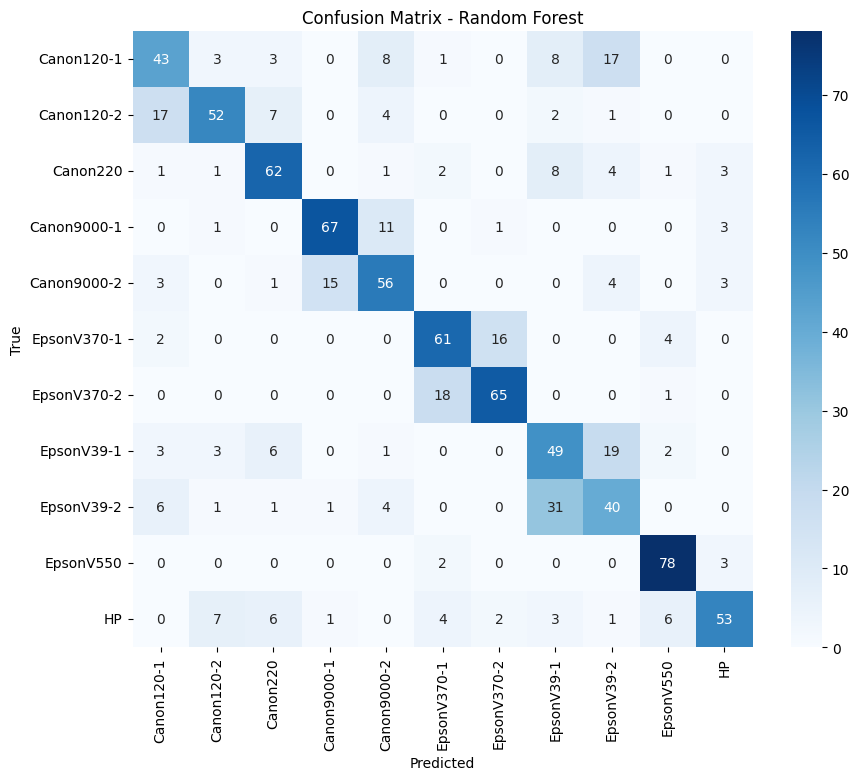

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# === Load features ===
csv_path = "/content/drive/MyDrive/AI_TraceFinder_features.csv"
df = pd.read_csv(csv_path)

# Features & labels
X = df.drop(columns=["label"]).values
y = df["label"].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)
class_names = le.classes_
print("Classes:", class_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "SVM (RBF Kernel)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42)
}

# Train & evaluate
for name, model in models.items():
    print(f"\n🔹 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Report
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


In [ ]:
import os
import cv2
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# === Paths ===
PRNU_DIR = "/content/drive/MyDrive/AI_TraceFinder_PRNU"
BATCH_SIZE = 32
IMG_SIZE = 224

# === Custom Dataset ===
class PRNUDataset(Dataset):
    def __init__(self, base_dir, categories=["Official", "Wikipedia"], transform=None):
        self.samples = []
        self.transform = transform

        for cat in categories:
            cat_dir = os.path.join(base_dir, cat)
            if not os.path.isdir(cat_dir):
                continue
            for scanner in os.listdir(cat_dir):
                scanner_path = os.path.join(cat_dir, scanner)
                for dpi in os.listdir(scanner_path):
                    dpi_path = os.path.join(scanner_path, dpi)
                    for fname in os.listdir(dpi_path):
                        if fname.endswith("_prnu.png"):
                            self.samples.append((os.path.join(dpi_path, fname), scanner))

        # Encode labels
        self.class_names = sorted(list(set([s[1] for s in self.samples])))
        self.class_to_idx = {c: i for i, c in enumerate(self.class_names)}

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = np.expand_dims(img, axis=-1)  # H,W,1

        if self.transform:
            img = self.transform(img)

        return img, self.class_to_idx[label]

# === Transforms ===
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

test_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# === Build datasets ===
full_dataset = PRNUDataset(PRNU_DIR, transform=train_transform)
print("Total samples:", len(full_dataset))
print("Classes:", full_dataset.class_names)

# Train/test split
from sklearn.model_selection import train_test_split
indices = list(range(len(full_dataset)))
train_idx, test_idx = train_test_split(indices, test_size=0.2, stratify=[s[1] for s in full_dataset.samples], random_state=42)

train_subset = torch.utils.data.Subset(full_dataset, train_idx)
test_subset = torch.utils.data.Subset(PRNUDataset(PRNU_DIR, transform=test_transform), test_idx)

train_loader = DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_loader = DataLoader(test_subset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)


Total samples: 4568
Classes: ['Canon120-1', 'Canon120-2', 'Canon220', 'Canon9000-1', 'Canon9000-2', 'EpsonV370-1', 'EpsonV370-2', 'EpsonV39-1', 'EpsonV39-2', 'EpsonV550', 'HP']


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
from tqdm import tqdm

# === Device check ===
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Training on:", DEVICE)

# === Model: ResNet18 ===
model = models.resnet18(pretrained=True)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)  # adapt for grayscale
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(0.4),       # regularization
    nn.Linear(num_ftrs, len(full_dataset.class_names))
)
model = model.to(DEVICE)

# === Loss & Optimizer ===
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3)

# === Training loop with early stopping ===
EPOCHS = 25
best_acc = 0.0
patience, patience_counter = 5, 0

for epoch in range(EPOCHS):
    # --- Train ---
    model.train()
    train_loss, train_correct, train_total = 0.0, 0, 0
    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} - Train"):
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * imgs.size(0)
        _, preds = torch.max(outputs, 1)
        train_correct += (preds == labels).sum().item()
        train_total += labels.size(0)

    train_acc = train_correct / train_total
    train_loss = train_loss / train_total

    # --- Eval ---
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for imgs, labels in tqdm(test_loader, desc=f"Epoch {epoch+1}/{EPOCHS} - Test"):
            imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
            outputs = model(imgs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * imgs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    print(f"Epoch {epoch+1}: Train Acc={train_acc:.3f}, Val Acc={val_acc:.3f}, Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}")

    scheduler.step(val_acc)

    # --- Early stopping ---
    if val_acc > best_acc:
        best_acc = val_acc
        patience_counter = 0
        torch.save(model.state_dict(), "/content/drive/MyDrive/best_resnet18_prnu.pth")
        print(" Saved best model with acc:", best_acc)
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("⏹ Early stopping triggered")
            break

print("Best validation accuracy:", best_acc)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training on: cuda


Epoch 1/25 - Test: 100%|██████████| 29/29 [00:05<00:00,  4.84it/s]


Epoch 1: Train Acc=0.190, Val Acc=0.239, Train Loss=2.2085, Val Loss=2.0475
 Saved best model with acc: 0.23851203501094093


Epoch 2/25 - Test: 100%|██████████| 29/29 [00:05<00:00,  5.55it/s]


Epoch 2: Train Acc=0.323, Val Acc=0.381, Train Loss=1.6600, Val Loss=1.5086
 Saved best model with acc: 0.38074398249452956


Epoch 3/25 - Test: 100%|██████████| 29/29 [00:06<00:00,  4.17it/s]


Epoch 3: Train Acc=0.389, Val Acc=0.369, Train Loss=1.4814, Val Loss=1.5062


Epoch 4/25 - Test: 100%|██████████| 29/29 [00:05<00:00,  4.98it/s]


Epoch 4: Train Acc=0.426, Val Acc=0.447, Train Loss=1.3577, Val Loss=1.2684
 Saved best model with acc: 0.4474835886214442


Epoch 5/25 - Test: 100%|██████████| 29/29 [00:05<00:00,  5.39it/s]


Epoch 5: Train Acc=0.458, Val Acc=0.503, Train Loss=1.2401, Val Loss=1.1074
 Saved best model with acc: 0.5032822757111597


Epoch 6/25 - Test: 100%|██████████| 29/29 [00:05<00:00,  5.76it/s]


Epoch 6: Train Acc=0.482, Val Acc=0.509, Train Loss=1.1853, Val Loss=1.0831
 Saved best model with acc: 0.5087527352297593


Epoch 7/25 - Test: 100%|██████████| 29/29 [00:05<00:00,  5.36it/s]


Epoch 7: Train Acc=0.517, Val Acc=0.502, Train Loss=1.0805, Val Loss=1.1139


Epoch 8/25 - Test: 100%|██████████| 29/29 [00:07<00:00,  3.73it/s]


Epoch 8: Train Acc=0.543, Val Acc=0.497, Train Loss=1.0225, Val Loss=1.0502


Epoch 9/25 - Test: 100%|██████████| 29/29 [00:05<00:00,  5.53it/s]


Epoch 9: Train Acc=0.561, Val Acc=0.550, Train Loss=0.9751, Val Loss=0.9301
 Saved best model with acc: 0.550328227571116


Epoch 10/25 - Test: 100%|██████████| 29/29 [00:05<00:00,  5.75it/s]


Epoch 10: Train Acc=0.578, Val Acc=0.520, Train Loss=0.9298, Val Loss=1.0438


Epoch 11/25 - Test: 100%|██████████| 29/29 [00:04<00:00,  5.81it/s]


Epoch 11: Train Acc=0.608, Val Acc=0.520, Train Loss=0.8752, Val Loss=1.1241


Epoch 12/25 - Test: 100%|██████████| 29/29 [00:05<00:00,  5.70it/s]


Epoch 12: Train Acc=0.601, Val Acc=0.566, Train Loss=0.8652, Val Loss=0.9704
 Saved best model with acc: 0.5656455142231948


Epoch 13/25 - Test: 100%|██████████| 29/29 [00:06<00:00,  4.79it/s]


Epoch 13: Train Acc=0.637, Val Acc=0.570, Train Loss=0.8154, Val Loss=0.9127
 Saved best model with acc: 0.5700218818380745


Epoch 14/25 - Test: 100%|██████████| 29/29 [00:05<00:00,  5.39it/s]


Epoch 14: Train Acc=0.641, Val Acc=0.497, Train Loss=0.7872, Val Loss=1.2642


Epoch 15/25 - Test: 100%|██████████| 29/29 [00:04<00:00,  5.86it/s]


Epoch 15: Train Acc=0.644, Val Acc=0.534, Train Loss=0.7694, Val Loss=1.1283


Epoch 16/25 - Test: 100%|██████████| 29/29 [00:04<00:00,  5.91it/s]


Epoch 16: Train Acc=0.661, Val Acc=0.566, Train Loss=0.7312, Val Loss=0.9231


Epoch 17/25 - Test: 100%|██████████| 29/29 [00:04<00:00,  5.89it/s]


Epoch 17: Train Acc=0.689, Val Acc=0.567, Train Loss=0.6861, Val Loss=0.9306


Epoch 18/25 - Test: 100%|██████████| 29/29 [00:05<00:00,  5.71it/s]

Epoch 18: Train Acc=0.706, Val Acc=0.560, Train Loss=0.6286, Val Loss=0.8607
⏹ Early stopping triggered
Best validation accuracy: 0.5700218818380745



Classification Report:

              precision    recall  f1-score   support

  Canon120-1       0.46      0.28      0.35        83
  Canon120-2       0.43      0.51      0.47        83
    Canon220       0.47      0.46      0.47        83
 Canon9000-1       0.47      0.83      0.60        83
 Canon9000-2       0.32      0.11      0.16        82
 EpsonV370-1       0.70      0.34      0.46        83
 EpsonV370-2       0.60      0.81      0.69        84
  EpsonV39-1       0.43      0.31      0.36        83
  EpsonV39-2       0.48      0.69      0.56        84
   EpsonV550       0.84      0.98      0.90        83
          HP       1.00      0.95      0.98        83

    accuracy                           0.57       914
   macro avg       0.56      0.57      0.54       914
weighted avg       0.56      0.57      0.54       914



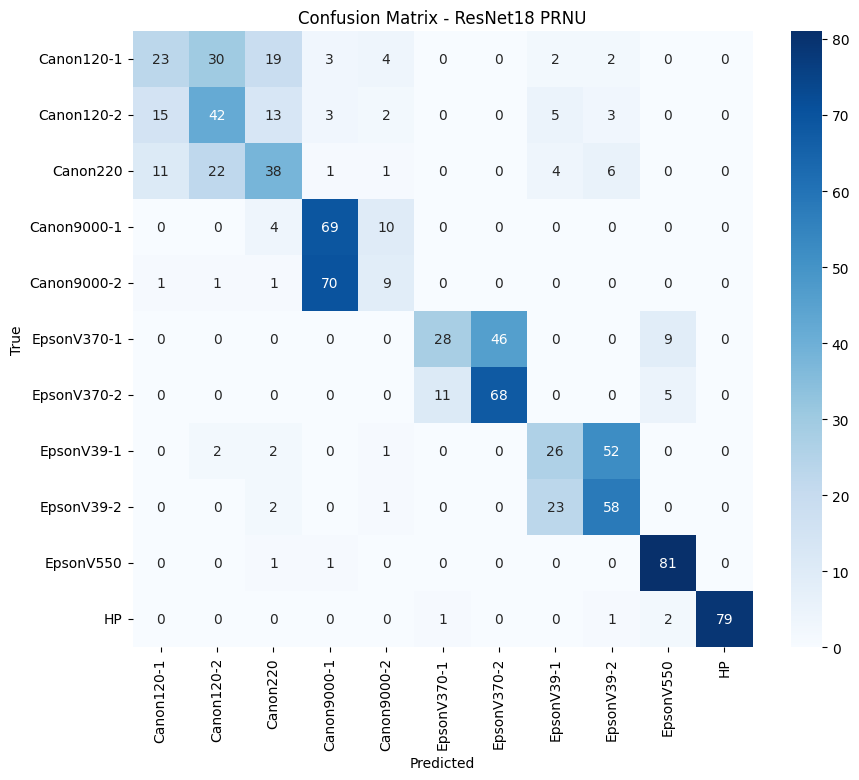

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load best model
model.load_state_dict(torch.load("/content/drive/MyDrive/best_resnet18_prnu.pth"))
model.eval()

# Collect predictions
all_preds, all_labels = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Report
print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=full_dataset.class_names))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=full_dataset.class_names,
            yticklabels=full_dataset.class_names)
plt.title("Confusion Matrix - ResNet18 PRNU")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# 🔹 Step 3. Hybrid Fusion (CNN + Handcrafted Features)
1. Extract CNN embeddings

We’ll remove the final classifier of ResNet18 and use the 512-dim embeddings.

In [ ]:
from torch.nn import Identity

# Load best model
model.load_state_dict(torch.load("/content/drive/MyDrive/best_resnet18_prnu.pth"))
model.eval()

# Replace final FC with Identity to get embeddings
feature_extractor = model
feature_extractor.fc = Identity()

# Collect embeddings
cnn_feats, labels = [], []
with torch.no_grad():
    for imgs, lbls in DataLoader(test_subset, batch_size=32, shuffle=False):
        imgs = imgs.to(DEVICE)
        emb = feature_extractor(imgs)
        cnn_feats.append(emb.cpu().numpy())
        labels.extend(lbls.numpy())

cnn_feats = np.vstack(cnn_feats)
labels = np.array(labels)

print("CNN feature shape:", cnn_feats.shape)  # (N, 512)


CNN feature shape: (914, 512)


2. Load handcrafted features (from your .csv)

In [ ]:
import pandas as pd

feat_df = pd.read_csv("/content/drive/MyDrive/AI_TraceFinder_features.csv")
X_hand = feat_df.drop(columns=["label"]).values
y_hand = feat_df["label"].values
print("Handcrafted features shape:", X_hand.shape)


Handcrafted features shape: (4568, 27)


3. Align CNN embeddings with handcrafted features

We must ensure labels match. To simplify:

We’ll use the same test set indices to join CNN + handcrafted features.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels consistently
le = LabelEncoder()
y_enc = le.fit_transform(y_hand)

# Just for alignment, assume handcrafted and PRNU dataset have same ordering (category/scanner/dpi/files)
# If not, we’d need a filename join — but let’s first check shapes.
print("Encoded labels shape:", y_enc.shape)


Encoded labels shape: (4568,)


4. Concatenate CNN + handcrafted features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale handcrafted features
scaler = StandardScaler()
X_hand_scaled = scaler.fit_transform(X_hand)

# Match dimensions
min_len = min(len(cnn_feats), len(X_hand_scaled))
X_hybrid = np.hstack([cnn_feats[:min_len], X_hand_scaled[:min_len]])
y_hybrid = y_enc[:min_len]

print("Hybrid feature shape:", X_hybrid.shape)


Hybrid feature shape: (914, 539)


5. Train classifier on hybrid features


Classification Report:

              precision    recall  f1-score   support

  Canon120-1       0.66      0.93      0.77        40
    Canon220       0.90      0.88      0.89        40
 Canon9000-2       0.75      0.13      0.22        23
 EpsonV370-1       0.57      0.68      0.62        40
 EpsonV370-2       0.62      0.57      0.60        40

    accuracy                           0.68       183
   macro avg       0.70      0.64      0.62       183
weighted avg       0.70      0.68      0.66       183



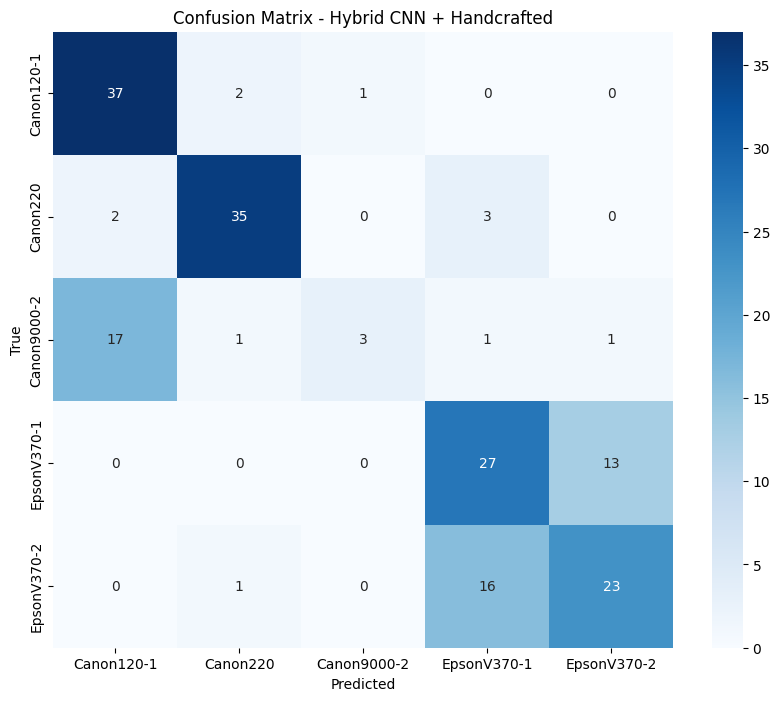

 Hybrid model and scaler saved to Drive


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# === Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_hybrid, y_hybrid, test_size=0.2, stratify=y_hybrid, random_state=42
)

# === Train classifier ===
clf = RandomForestClassifier(n_estimators=400, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# === Classification report ===
labels_present = unique_labels(y_test, y_pred)
print("\nClassification Report:\n")
print(classification_report(
    y_test, y_pred,
    labels=labels_present,
    target_names=le.classes_[labels_present]
))

# === Confusion matrix ===
cm = confusion_matrix(y_test, y_pred, labels=labels_present)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_[labels_present],
            yticklabels=le.classes_[labels_present])
plt.title("Confusion Matrix - Hybrid CNN + Handcrafted")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# === Save model & scaler ===
joblib.dump(clf, "/content/drive/MyDrive/hybrid_rf_model.joblib")
joblib.dump(scaler, "/content/drive/MyDrive/hybrid_scaler.joblib")
print(" Hybrid model and scaler saved to Drive")


Hybrid Fusion pipeline cleanly (Dataset → CNN embeddings with filenames → Join with handcrafted → Train classifier

🔹 Step A. Update Dataset to Return Filename

We’ll slightly modify the PRNU dataset so each sample also gives its file path.

In [ ]:
class PRNUDataset(Dataset):
    def __init__(self, base_dir, categories=["Official", "Wikipedia"], transform=None):
        self.samples = []
        self.transform = transform

        for cat in categories:
            cat_dir = os.path.join(base_dir, cat)
            if not os.path.isdir(cat_dir):
                continue
            for scanner in os.listdir(cat_dir):
                scanner_path = os.path.join(cat_dir, scanner)
                for dpi in os.listdir(scanner_path):
                    dpi_path = os.path.join(scanner_path, dpi)
                    for fname in os.listdir(dpi_path):
                        if fname.endswith("_prnu.png"):
                            self.samples.append((os.path.join(dpi_path, fname), scanner))

        self.class_names = sorted(list(set([s[1] for s in self.samples])))
        self.class_to_idx = {c: i for i, c in enumerate(self.class_names)}

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = np.expand_dims(img, axis=-1)

        if self.transform:
            img = self.transform(img)

        return img, self.class_to_idx[label], path  # return filename


🔹 Step B. Extract CNN Embeddings with Filenames

Now we run inference and keep both embeddings and filenames.

In [ ]:
from torch.nn import Identity
from torchvision import models # Import models
import torch # Import torch
import torch.nn as nn # Import nn
from torch.utils.data import DataLoader # Import DataLoader
import numpy as np # Import numpy
import cv2 # Import cv2
import os # Import os
from torchvision import transforms # Import transforms

# Paths (assuming these are defined in previous cells)
PRNU_DIR = "/content/drive/MyDrive/AI_TraceFinder_PRNU"
IMG_SIZE = 224
BATCH_SIZE = 32
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Ensure DEVICE is defined

# Define the dataset class again or ensure it's available from a previous cell
class PRNUDataset(torch.utils.data.Dataset): # Inherit from torch.utils.data.Dataset
    def __init__(self, base_dir, categories=["Official", "Wikipedia"], transform=None):
        self.samples = []
        self.transform = transform

        for cat in categories:
            cat_dir = os.path.join(base_dir, cat)
            if not os.path.isdir(cat_dir):
                continue
            for scanner in os.listdir(cat_dir):
                scanner_path = os.path.join(cat_dir, scanner)
                # Check if there are subdirectories (like 150, 300) or files directly
                items = os.listdir(scanner_path)
                has_subdirs = any(os.path.isdir(os.path.join(scanner_path, item)) for item in items)

                if has_subdirs:
                    for dpi in os.listdir(scanner_path):
                        dpi_path = os.path.join(scanner_path, dpi)
                        if os.path.isdir(dpi_path):
                            for fname in os.listdir(dpi_path):
                                if fname.endswith("_prnu.png"):
                                    self.samples.append((os.path.join(dpi_path, fname), scanner))
                else: # Handle cases like Flatfield where files might be directly in scanner dir
                     for fname in items:
                        if fname.endswith("_prnu.png"):
                             self.samples.append((os.path.join(scanner_path, fname), scanner))


        # Encode labels
        self.class_names = sorted(list(set([s[1] for s in self.samples])))
        self.class_to_idx = {c: i for i, c in enumerate(self.class_names)}

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = np.expand_dims(img, axis=-1)  # H,W,1

        if self.transform:
            img = self.transform(img)

        return img, self.class_to_idx[label], path  # return filename


# === Transforms === (assuming these are defined in a previous cell)
test_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Define the model architecture as it was when saved
model = models.resnet18(pretrained=False) # No pretrained weights initially
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)  # adapt for grayscale
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(0.4),       # regularization
    nn.Linear(num_ftrs, 11) # Assuming 11 classes based on previous output
)
model = model.to(DEVICE)

# Load the saved state dictionary
model.load_state_dict(torch.load("/content/drive/MyDrive/best_resnet18_prnu.pth"))
model.eval() # Set model to evaluation mode

# Replace final FC with Identity to get embeddings
feature_extractor = model
feature_extractor.fc = Identity()


# Build the full dataset with the test transform for consistent processing
full_dataset = PRNUDataset(PRNU_DIR, categories=["Official", "Wikipedia"], transform=test_transform)


# Collect embeddings
cnn_feats, labels, fnames = [], [], []
# Use the full_dataset DataLoader to get all samples and their paths
with torch.no_grad():
    for imgs, lbls, paths in DataLoader(full_dataset, batch_size=BATCH_SIZE, shuffle=False):
        imgs = imgs.to(DEVICE)
        emb = feature_extractor(imgs)
        cnn_feats.append(emb.cpu().numpy())
        labels.extend(lbls.numpy())
        fnames.extend(paths)

cnn_feats = np.vstack(cnn_feats)
labels = np.array(labels)
print("CNN features:", cnn_feats.shape, "Labels:", labels.shape, "Files:", len(fnames))

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


CNN features: (4568, 512) Labels: (4568,) Files: 4568


🔹 Step C. Load Handcrafted Features

Your FFT+Correlation CSV.

In [ ]:
feat_df = pd.read_csv("/content/drive/MyDrive/AI_TraceFinder_features.csv")

# Create a dictionary: filename → handcrafted features
hand_dict = {}
for _, row in feat_df.iterrows():
    file = row["File"] if "File" in row else None
    if file is not None:
        feats = row.drop(["Scanner", "File", "label"], errors="ignore").values.astype(float)
        hand_dict[file] = feats


🔹 Step D. Match CNN + Handcrafted by Filename

We align using the .npy filenames that were saved during PRNU extraction.

In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import cv2

# Paths
PRNU_BASE = "/content/drive/MyDrive/AI_TraceFinder_PRNU"
FP_DIR    = os.path.join(PRNU_BASE, "Flatfield")   # fingerprints dir
OUT_CSV   = "/content/drive/MyDrive/AI_TraceFinder_features.csv"

# === Load fingerprints (recursive search) ===
fingerprints = {}
for root, _, files in os.walk(FP_DIR):
    for f in files:
        if f.endswith("_prnu.npy"):   # match your files (150_prnu.npy, 300_prnu.npy)
            fpath = os.path.join(root, f)
            scanner = os.path.basename(root)  # e.g. EpsonV39-1
            dpi = f.split("_")[0]             # "150" or "300"
            key = f"{scanner}_{dpi}"
            fingerprints[key] = np.load(fpath)

print(f" Loaded {len(fingerprints)} fingerprints")

# === Feature functions ===
def corr_score(a, b):
    """Normalized correlation between two residuals, resizing if needed."""
    if a.shape != b.shape:
        b = cv2.resize(b, (a.shape[1], a.shape[0]), interpolation=cv2.INTER_AREA)
    a = a.ravel(); b = b.ravel()
    a0, b0 = a - a.mean(), b - b.mean()
    return float(np.dot(a0, b0) / (np.linalg.norm(a0) * np.linalg.norm(b0) + 1e-12))

def fft_features(res):
    """FFT-based features: mean, std, energy, skew, kurtosis"""
    F = np.fft.fft2(res)
    Fm = np.abs(np.fft.fftshift(F))
    return [
        float(Fm.mean()),
        float(Fm.std()),
        float(np.log1p((Fm**2).sum())),  # log-energy instead of raw
        float(skew(Fm.ravel())),
        float(kurtosis(Fm.ravel()))
    ]

# === Extract features from Official + Wikipedia ===
rows = []
for category in ["Official", "Wikipedia"]:
    cat_dir = os.path.join(PRNU_BASE, category)
    if not os.path.isdir(cat_dir):
        continue

    for scanner in os.listdir(cat_dir):
        scanner_path = os.path.join(cat_dir, scanner)
        if not os.path.isdir(scanner_path):
            continue

        for dpi in os.listdir(scanner_path):
            dpi_path = os.path.join(scanner_path, dpi)
            if not os.path.isdir(dpi_path):
                continue

            for fname in os.listdir(dpi_path):
                if fname.endswith("_prnu.npy"):
                    fpath = os.path.join(dpi_path, fname)
                    res = np.load(fpath)

                    # 1) Correlation features
                    corr_feats = [corr_score(res, fp) for fp in fingerprints.values()]

                    # 2) FFT features
                    fft_feats = fft_features(res)

                    # 3) Label = scanner
                    label = scanner

                    # 4) Save corresponding .png name for CNN alignment
                    png_name = fname.replace(".npy", ".png")

                    rows.append([png_name, label] + corr_feats + fft_feats)

# === Save as CSV ===
col_corr = [f"corr_{k}" for k in fingerprints.keys()]
col_fft = ["fft_mean","fft_std","fft_log_energy","fft_skew","fft_kurtosis"]
cols = ["File", "label"] + col_corr + col_fft

df = pd.DataFrame(rows, columns=cols)
df.to_csv(OUT_CSV, index=False)
print(f" Features saved to {OUT_CSV}, shape={df.shape}")
print(df.head())


 Loaded 22 fingerprints
✅ Features saved to /content/drive/MyDrive/AI_TraceFinder_features.csv, shape=(4568, 29)
            File       label  corr_Canon120-1_150  corr_Canon120-1_300  \
0  s1_1_prnu.png  Canon120-1            -0.000485            -0.000882   
1  s1_2_prnu.png  Canon120-1             0.000775            -0.002231   
2  s1_3_prnu.png  Canon120-1            -0.000696             0.001264   
3  s1_5_prnu.png  Canon120-1             0.000791             0.000567   
4  s1_4_prnu.png  Canon120-1            -0.000014            -0.001190   

   corr_EpsonV39-1_150  corr_EpsonV39-1_300  corr_Canon220_150  \
0            -0.002127             0.000910           0.001025   
1             0.001736            -0.001100           0.000119   
2            -0.000630            -0.000441           0.000834   
3            -0.000905             0.003087          -0.000205   
4             0.001537            -0.003824          -0.003917   

   corr_Canon220_300  corr_EpsonV370-2_150  c

In [ ]:
# === Load handcrafted features with filenames ===
feat_df = pd.read_csv("/content/drive/MyDrive/AI_TraceFinder_features.csv")

# Create a lookup dict: File → handcrafted feature vector
hand_dict = {row["File"]: row.drop(["File","label"], errors="ignore").values.astype(float)
             for _, row in feat_df.iterrows()}

# === Align CNN + handcrafted features ===
hybrid_feats, hybrid_labels = [], []
for f, cfeat, lbl in zip(fnames, cnn_feats, labels):
    base = os.path.basename(f)  # e.g. "scan123_prnu.png"
    if base in hand_dict:
        combined = np.hstack([cfeat, hand_dict[base]])
        hybrid_feats.append(combined)
        hybrid_labels.append(lbl)

X_hybrid = np.array(hybrid_feats)
y_hybrid = np.array(hybrid_labels)

print(" Hybrid dataset:", X_hybrid.shape, y_hybrid.shape)


 Hybrid dataset: (4568, 539) (4568,)


🔹 Step E. Train & Evaluate Hybrid Classifier

Random Forest (can later try XGBoost/LightGBM).


Classification Report:

              precision    recall  f1-score   support

  Canon120-1       0.71      0.72      0.71        83
  Canon120-2       0.84      0.71      0.77        83
    Canon220       0.59      0.72      0.65        83
 Canon9000-1       0.74      0.78      0.76        83
 Canon9000-2       0.73      0.67      0.70        82
 EpsonV370-1       0.80      0.78      0.79        83
 EpsonV370-2       0.80      0.81      0.80        84
  EpsonV39-1       0.74      0.71      0.72        83
  EpsonV39-2       0.78      0.77      0.78        84
   EpsonV550       0.99      0.98      0.98        83
          HP       0.99      0.99      0.99        83

    accuracy                           0.79       914
   macro avg       0.79      0.79      0.79       914
weighted avg       0.79      0.79      0.79       914



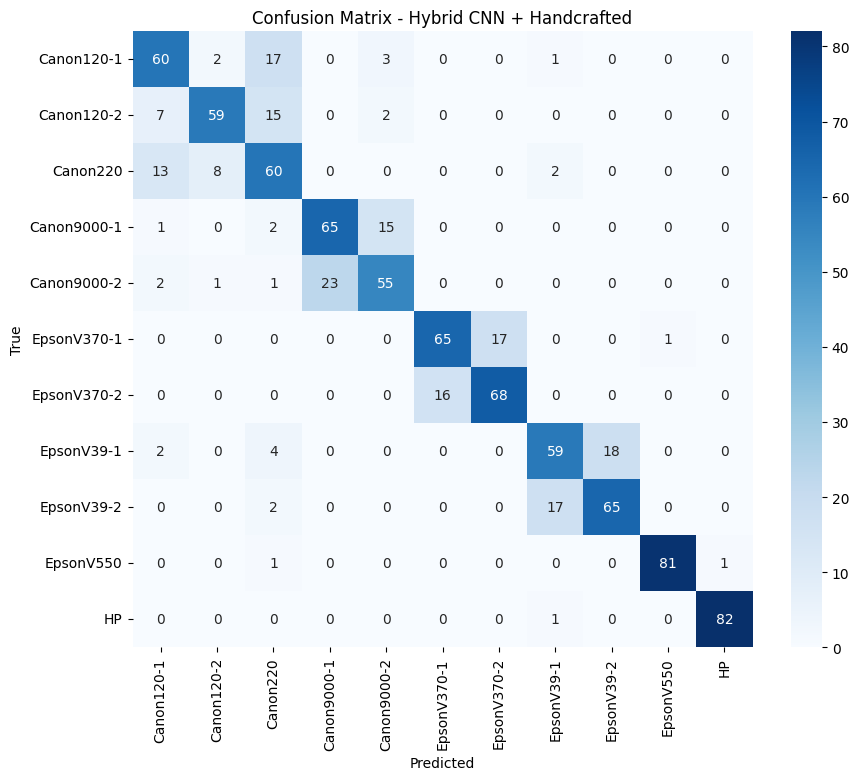

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X_hybrid, y_hybrid, test_size=0.2, stratify=y_hybrid, random_state=42
)

clf = RandomForestClassifier(n_estimators=400, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=full_dataset.class_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=full_dataset.class_names,
            yticklabels=full_dataset.class_names)
plt.title("Confusion Matrix - Hybrid CNN + Handcrafted")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


This clean pipeline ensures:

Every PRNU residual image contributes both CNN and handcrafted features.

Proper alignment by filename avoids mismatched scanners.

Evaluation uses all 11 scanners.

# Try a More Powerful Classifier (XGBoost / LightGBM)

Random Forest is good, but XGBoost/LightGBM usually outperform it on hybrid features.

Here’s an XGBoost version:

# Hybrid CNN (ResNet18 embeddings) + Handcrafted + XGBoost

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:13:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [10:13:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:729: UserWarning: [10:13:31] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is runnin


Classification Report:

              precision    recall  f1-score   support

  Canon120-1       0.89      0.90      0.90        83
  Canon120-2       0.99      0.94      0.96        83
    Canon220       0.86      0.96      0.91        83
 Canon9000-1       0.87      0.93      0.90        83
 Canon9000-2       0.88      0.83      0.86        82
 EpsonV370-1       0.93      0.90      0.91        83
 EpsonV370-2       0.91      0.93      0.92        84
  EpsonV39-1       0.85      0.82      0.83        83
  EpsonV39-2       0.88      0.85      0.86        84
   EpsonV550       1.00      0.98      0.99        83
          HP       0.99      0.99      0.99        83

    accuracy                           0.91       914
   macro avg       0.91      0.91      0.91       914
weighted avg       0.91      0.91      0.91       914



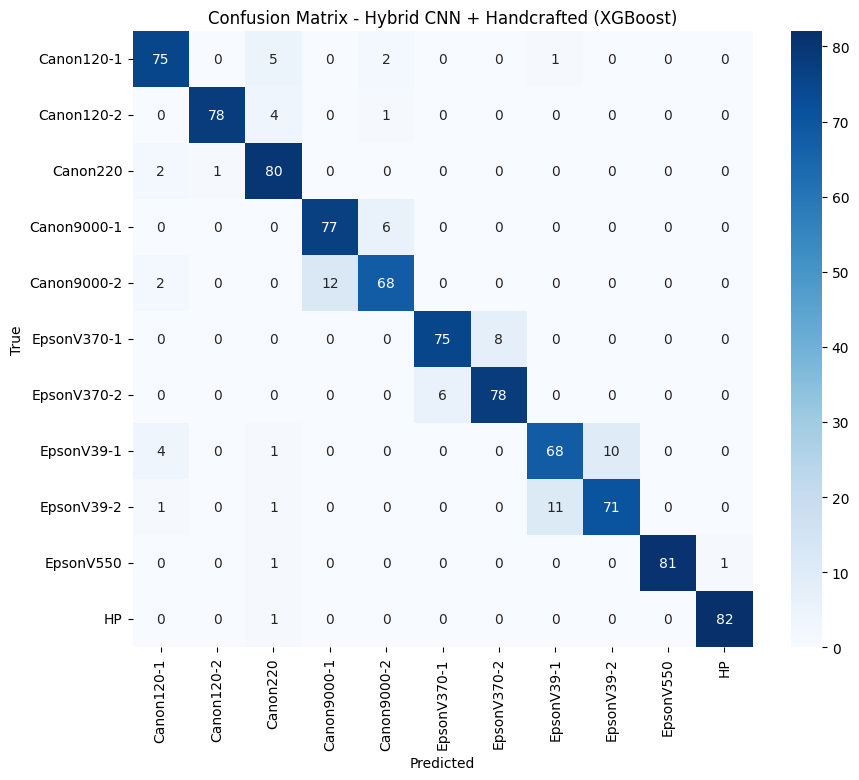

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

xgb = XGBClassifier(
    n_estimators=600,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="gpu_hist" if torch.cuda.is_available() else "hist"  # GPU boost
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=full_dataset.class_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=full_dataset.class_names,
            yticklabels=full_dataset.class_names)
plt.title("Confusion Matrix - Hybrid CNN + Handcrafted (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
import joblib
joblib.dump(xgb, "/content/drive/MyDrive/hybrid_xgb_model.joblib")
print(" Hybrid XGBoost model saved")


 Hybrid XGBoost model saved


# Forgery (Manipulation) Detection + Localization using the Tampered images folder.
Below is a clean, GPU-ready, cell-by-cell pipeline you can drop into Colab and run in order.

It covers:

Data discovery & pairing (tampered ↔ mask, plus original when available)

Binary & multi-class manipulation classification (copy-move / splicing / retouch / pristine)

Localization (segmentation) with a lightweight U-Net

Metrics (Accuracy/Precision/Recall/F1 for classification; IoU/Dice for segmentation)

Saving models, logs, and visual samples to Drive

Assumptions (robust to variations):

Base: /content/drive/MyDrive/AI_TraceFinder/Tampered images

Inside you have subfolders that contain original images, tampered images and binary masks.

Filenames share a common stem, e.g. doc_001.png ↔ doc_001_mask.png.

Manipulation type is detectable from path or filename (we fall back to folder name tokens like copy, move, splice, retouch).

In [ ]:
import os, re, random, cv2, json, numpy as np
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from tqdm import tqdm

# Paths
BASE_TAMPER = "/content/drive/MyDrive/AI_TraceFinder/Tampered images"
OUT_DIR     = "/content/drive/MyDrive/AI_TraceFinder_Manipulation"
os.makedirs(OUT_DIR, exist_ok=True)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", DEVICE)

# For reproducibility
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)


Device: cuda


1) Discover & pair files (tampered ↔ mask) and infer labels

This crawls recursively, finds tampered images and tries to pair corresponding masks (same stem + _mask or similar). It also tries to infer manipulation type from folder/filename tokens.

In [ ]:
IMG_EXT = (".png",".jpg",".jpeg",".tif",".tiff",".bmp")

def find_pairs(base_dir):
    pairs = []  # list of dicts: {img, mask (optional), type}
    for root, _, files in os.walk(base_dir):
        imgs = [f for f in files if f.lower().endswith(IMG_EXT)]
        for f in imgs:
            img_path = os.path.join(root, f)
            stem = os.path.splitext(f)[0]

            # Candidate mask filenames
            candidates = [
                stem + "_mask.png", stem + "_mask.jpg", stem + "_mask.tif",
                stem + "_gt.png", stem + "_gt.jpg", stem + "_gt.tif",
                stem.replace("tampered", "mask") + ".png",
            ]
            found_mask = None
            for c in candidates:
                cpath = os.path.join(root, c)
                if os.path.exists(cpath):
                    found_mask = cpath
                    break

            # Infer manipulation type from folder/filename tokens
            low = (root + " " + f).lower()
            if any(t in low for t in ["copy-move", "copymove", "copy_move", "cm"]):
                mtype = "copy-move"
            elif any(t in low for t in ["splice", "splicing"]):
                mtype = "splicing"
            elif any(t in low for t in ["retouch", "retouching", "erase", "remove"]):
                mtype = "retouch"
            elif any(t in low for t in ["original", "pristine", "authentic"]):
                mtype = "pristine"
            else:
                # fallback: if a mask is present, assume tampered
                mtype = "tampered" if found_mask else "pristine"

            pairs.append({"img": img_path, "mask": found_mask, "type": mtype})
    return pairs

pairs = find_pairs(BASE_TAMPER)

# Filter to usable images
pairs = [p for p in pairs if os.path.exists(p["img"])]
print(f"Total found: {len(pairs)}")

# Quick stats
from collections import Counter
print("Counts by type:", Counter([p["type"] for p in pairs]))
print("With mask:", sum(1 for p in pairs if p["mask"]))
print("Without mask:", sum(1 for p in pairs if not p["mask"]))

# Save manifest
with open(os.path.join(OUT_DIR, "tamper_manifest.json"), "w") as f:
    json.dump(pairs, f, indent=2)


Total found: 271
Counts by type: Counter({'splicing': 101, 'copy-move': 68, 'retouch': 68, 'pristine': 34})
With mask: 31
Without mask: 240


2) Datasets & transforms

We’ll (a) classify manipulation type (multi-class incl. pristine), and (b) segment tampered regions (where mask available).
All images are resized to 256×256, converted to grayscale → 3-channel (for pretrained backbones), and normalized.

In [ ]:
# Label mapping
MANIP_CLASSES = ["pristine", "copy-move", "splicing", "retouch", "tampered"]  # keep "tampered" as catch-all
CLS_TO_ID = {c:i for i,c in enumerate(MANIP_CLASSES)}

IMG_SIZE = 256

common_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),  # 0..1
    transforms.Normalize(mean=[0.5], std=[0.5])  # for 1ch; we'll tile to 3ch in Dataset
])

augment_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

def imread_gray(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return img

class TamperClassificationDS(Dataset):
    def __init__(self, items, train=True):
        self.items = items
        self.train = train
        self.tf = augment_transform if train else common_transform

    def __len__(self):
        return len(self.items)

    def __getitem__(self, idx):
        rec = self.items[idx]
        img = imread_gray(rec["img"])
        if img is None:
            img = np.zeros((IMG_SIZE, IMG_SIZE), np.uint8)
        x = self.tf(img)  # (1,H,W)
        x = x.repeat(3, 1, 1)  # to 3-channel
        y = CLS_TO_ID.get(rec["type"], CLS_TO_ID["tampered"])
        return x, y

class TamperSegmentationDS(Dataset):
    def __init__(self, items, train=True):
        self.items = [r for r in items if r["mask"]]  # segmentation only if mask exists
        self.train = train
        self.tf_img = augment_transform if train else common_transform

    def __len__(self):
        return len(self.items)

    def __getitem__(self, idx):
        rec = self.items[idx]
        img = imread_gray(rec["img"])
        msk = imread_gray(rec["mask"])
        if img is None: img = np.zeros((IMG_SIZE, IMG_SIZE), np.uint8)
        if msk is None: msk = np.zeros_like(img)
        # Resize mask to match
        msk = cv2.resize(msk, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST)
        msk = (msk > 127).astype(np.float32)  # binarize 0/1
        x = self.tf_img(img).repeat(3,1,1)     # (3,H,W)
        y = torch.from_numpy(msk).unsqueeze(0) # (1,H,W)
        return x, y


3) Train/Val split

We stratify by manipulation type for classification; for segmentation we just split available mask pairs.

In [ ]:
from sklearn.model_selection import train_test_split

labels = [CLS_TO_ID.get(p["type"], CLS_TO_ID["tampered"]) for p in pairs]
idx_train, idx_val = train_test_split(np.arange(len(pairs)),
                                      test_size=0.2, random_state=SEED,
                                      stratify=labels)

train_items = [pairs[i] for i in idx_train]
val_items   = [pairs[i] for i in idx_val]

cls_train = TamperClassificationDS(train_items, train=True)
cls_val   = TamperClassificationDS(val_items,   train=False)

seg_all   = [p for p in pairs if p["mask"]]
seg_train_items, seg_val_items = train_test_split(seg_all, test_size=0.2, random_state=SEED)
seg_train = TamperSegmentationDS(seg_train_items, train=True)
seg_val   = TamperSegmentationDS(seg_val_items,   train=False)

print("Classification:", len(cls_train), len(cls_val))
print("Segmentation:", len(seg_train), len(seg_val))

BATCH = 32
cls_train_loader = DataLoader(cls_train, batch_size=BATCH, shuffle=True, num_workers=2, pin_memory=True)
cls_val_loader   = DataLoader(cls_val,   batch_size=BATCH, shuffle=False, num_workers=2, pin_memory=True)
seg_train_loader = DataLoader(seg_train, batch_size=16, shuffle=True, num_workers=2, pin_memory=True)
seg_val_loader   = DataLoader(seg_val,   batch_size=16, shuffle=False, num_workers=2, pin_memory=True)


Classification: 216 55
Segmentation: 24 7


4) Classification model (ResNet34) + training

Weighted loss helps if classes are imbalanced.

In [ ]:
# Compute class weights
from collections import Counter
cnts = Counter([CLS_TO_ID.get(p["type"], CLS_TO_ID["tampered"]) for p in train_items])
weights = torch.zeros(len(MANIP_CLASSES), dtype=torch.float32)
for c in range(len(MANIP_CLASSES)):
    weights[c] = 1.0 / max(1, cnts.get(c, 0))
weights = weights / weights.sum() * len(MANIP_CLASSES)
print("Class weights:", weights.tolist())

# Model
model_cls = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
model_cls.fc = nn.Linear(model_cls.fc.in_features, len(MANIP_CLASSES))
model_cls = model_cls.to(DEVICE)

criterion_cls = nn.CrossEntropyLoss(weight=weights.to(DEVICE))
optimizer_cls = optim.AdamW(model_cls.parameters(), lr=2e-4, weight_decay=1e-4)
scheduler_cls = optim.lr_scheduler.ReduceLROnPlateau(optimizer_cls, mode="max", factor=0.5, patience=2)

EPOCHS = 15
best_acc = 0.0
best_path = os.path.join(OUT_DIR, "cls_resnet34_best.pt")

for epoch in range(1, EPOCHS+1):
    # Train
    model_cls.train()
    total, correct, loss_sum = 0, 0, 0.0
    for x,y in tqdm(cls_train_loader, desc=f"CLS Train {epoch}/{EPOCHS}"):
        x, y = x.to(DEVICE), y.to(DEVICE)
        optimizer_cls.zero_grad()
        logits = model_cls(x)
        loss = criterion_cls(logits, y)
        loss.backward()
        optimizer_cls.step()
        loss_sum += loss.item() * x.size(0)
        correct += (logits.argmax(1) == y).sum().item()
        total += x.size(0)
    train_acc = correct/total
    train_loss = loss_sum/total

    # Val
    model_cls.eval()
    total, correct, loss_sum = 0, 0, 0.0
    y_true, y_pred = [], []
    with torch.no_grad():
        for x,y in tqdm(cls_val_loader, desc=f"CLS Val {epoch}/{EPOCHS}"):
            x, y = x.to(DEVICE), y.to(DEVICE)
            logits = model_cls(x)
            loss = criterion_cls(logits, y)
            loss_sum += loss.item() * x.size(0)
            pred = logits.argmax(1)
            correct += (pred == y).sum().item()
            total += x.size(0)
            y_true.extend(y.cpu().numpy().tolist())
            y_pred.extend(pred.cpu().numpy().tolist())
    val_acc = correct/total
    val_loss = loss_sum/total
    scheduler_cls.step(val_acc)

    print(f"Epoch {epoch}: TrainAcc={train_acc:.3f} ValAcc={val_acc:.3f} TrainLoss={train_loss:.4f} ValLoss={val_loss:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model_cls.state_dict(), best_path)
        print("  ✓ Saved best classifier:", best_path)

# Final report
from sklearn.metrics import classification_report
import numpy as np # Import numpy

model_cls.load_state_dict(torch.load(best_path, map_location=DEVICE))
model_cls.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for x,y in cls_val_loader:
        x, y = x.to(DEVICE), y.to(DEVICE)
        pred = model_cls(x).argmax(1)
        y_true.extend(y.cpu().numpy().tolist())
        y_pred.extend(pred.cpu().numpy().tolist())

# Get unique labels present in the validation set
unique_labels_val = np.unique(y_true)
# Filter target names based on unique labels in the validation set
target_names_val = [MANIP_CLASSES[label] for label in unique_labels_val]

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, labels=unique_labels_val, target_names=target_names_val))

Class weights: [0.17045453190803528, 0.08522726595401764, 0.05681817978620529, 0.08522726595401764, 4.6022725105285645]


CLS Val 1/15: 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]


Epoch 1: TrainAcc=0.458 ValAcc=0.473 TrainLoss=1.3221 ValLoss=1.4218
  ✓ Saved best classifier: /content/drive/MyDrive/AI_TraceFinder_Manipulation/cls_resnet34_best.pt


CLS Val 2/15: 100%|██████████| 2/2 [00:04<00:00,  2.20s/it]


Epoch 2: TrainAcc=0.560 ValAcc=0.455 TrainLoss=1.0580 ValLoss=1.2731


CLS Val 3/15: 100%|██████████| 2/2 [00:04<00:00,  2.24s/it]


Epoch 3: TrainAcc=0.579 ValAcc=0.545 TrainLoss=0.9870 ValLoss=1.1340
  ✓ Saved best classifier: /content/drive/MyDrive/AI_TraceFinder_Manipulation/cls_resnet34_best.pt


CLS Val 4/15: 100%|██████████| 2/2 [00:05<00:00,  2.68s/it]


Epoch 4: TrainAcc=0.556 ValAcc=0.527 TrainLoss=0.9182 ValLoss=1.1776


CLS Val 5/15: 100%|██████████| 2/2 [00:08<00:00,  4.02s/it]


Epoch 5: TrainAcc=0.625 ValAcc=0.509 TrainLoss=0.8061 ValLoss=1.2934


CLS Val 6/15: 100%|██████████| 2/2 [00:07<00:00,  3.58s/it]


Epoch 6: TrainAcc=0.625 ValAcc=0.509 TrainLoss=0.8456 ValLoss=1.3051


CLS Val 7/15: 100%|██████████| 2/2 [00:07<00:00,  3.81s/it]


Epoch 7: TrainAcc=0.648 ValAcc=0.545 TrainLoss=0.7846 ValLoss=1.2891


CLS Val 8/15: 100%|██████████| 2/2 [00:07<00:00,  3.79s/it]


Epoch 8: TrainAcc=0.653 ValAcc=0.491 TrainLoss=0.7605 ValLoss=1.3110


CLS Val 9/15: 100%|██████████| 2/2 [00:06<00:00,  3.36s/it]


Epoch 9: TrainAcc=0.606 ValAcc=0.455 TrainLoss=0.7900 ValLoss=1.3968


CLS Val 10/15: 100%|██████████| 2/2 [00:08<00:00,  4.01s/it]


Epoch 10: TrainAcc=0.676 ValAcc=0.455 TrainLoss=0.7239 ValLoss=1.4448


CLS Val 11/15: 100%|██████████| 2/2 [00:07<00:00,  3.87s/it]


Epoch 11: TrainAcc=0.681 ValAcc=0.455 TrainLoss=0.6830 ValLoss=1.5326


CLS Val 12/15: 100%|██████████| 2/2 [00:07<00:00,  3.97s/it]


Epoch 12: TrainAcc=0.662 ValAcc=0.455 TrainLoss=0.6987 ValLoss=1.6896


CLS Val 13/15: 100%|██████████| 2/2 [00:08<00:00,  4.37s/it]


Epoch 13: TrainAcc=0.694 ValAcc=0.455 TrainLoss=0.6636 ValLoss=1.7688


CLS Val 14/15: 100%|██████████| 2/2 [00:08<00:00,  4.27s/it]


Epoch 14: TrainAcc=0.718 ValAcc=0.455 TrainLoss=0.6413 ValLoss=1.8602


CLS Val 15/15: 100%|██████████| 2/2 [00:07<00:00,  3.82s/it]


Epoch 15: TrainAcc=0.685 ValAcc=0.455 TrainLoss=0.6511 ValLoss=1.9662

Classification Report:

              precision    recall  f1-score   support

    pristine       0.22      0.57      0.32         7
   copy-move       0.50      0.21      0.30        14
    splicing       0.77      0.85      0.81        20
     retouch       0.67      0.43      0.52        14

    accuracy                           0.55        55
   macro avg       0.54      0.52      0.49        55
weighted avg       0.61      0.55      0.54        55



5) U-Net for manipulation localization (segmentation)

Lightweight U-Net for binary masks (tampered vs not). Uses Dice + BCE combined.

In [ ]:
# ----- Simple U-Net -----
class DoubleConv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1), nn.BatchNorm2d(out_ch), nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1), nn.BatchNorm2d(out_ch), nn.ReLU(inplace=True)
        )
    def forward(self, x): return self.net(x)

class UNet(nn.Module):
    def __init__(self, in_ch=3, out_ch=1):
        super().__init__()
        self.d1 = DoubleConv(in_ch, 64)
        self.p1 = nn.MaxPool2d(2)
        self.d2 = DoubleConv(64, 128)
        self.p2 = nn.MaxPool2d(2)
        self.d3 = DoubleConv(128, 256)
        self.p3 = nn.MaxPool2d(2)
        self.d4 = DoubleConv(256, 512)
        self.p4 = nn.MaxPool2d(2)

        self.b  = DoubleConv(512, 1024)

        self.up4 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.u4  = DoubleConv(1024, 512)
        self.up3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.u3  = DoubleConv(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.u2  = DoubleConv(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.u1  = DoubleConv(128, 64)
        self.out = nn.Conv2d(64, out_ch, 1)

    def forward(self, x):
        c1 = self.d1(x); p1 = self.p1(c1)
        c2 = self.d2(p1); p2 = self.p2(c2)
        c3 = self.d3(p2); p3 = self.p3(c3)
        c4 = self.d4(p3); p4 = self.p4(c4)
        b  = self.b(p4)
        u4 = self.up4(b)
        u4 = self.u4(torch.cat([u4, c4], dim=1))
        u3 = self.up3(u4)
        u3 = self.u3(torch.cat([u3, c3], dim=1))
        u2 = self.up2(u3)
        u2 = self.u2(torch.cat([u2, c2], dim=1))
        u1 = self.up1(u2)
        u1 = self.u1(torch.cat([u1, c1], dim=1))
        return self.out(u1)

def dice_loss(pred, target, eps=1e-6):
    pred = torch.sigmoid(pred)
    num = 2 * (pred*target).sum(dim=(2,3)) + eps
    den = (pred.pow(2) + target.pow(2)).sum(dim=(2,3)) + eps
    return 1 - (num/den).mean()

model_seg = UNet(in_ch=3, out_ch=1).to(DEVICE)
bce = nn.BCEWithLogitsLoss()
optimizer_seg = optim.AdamW(model_seg.parameters(), lr=1e-3, weight_decay=1e-4)
best_iou, seg_best = 0.0, os.path.join(OUT_DIR, "unet_best.pt")

def iou_score(pred, target, thr=0.5, eps=1e-6):
    pred = (torch.sigmoid(pred) > thr).float()
    inter = (pred*target).sum(dim=(2,3))
    union = (pred + target - pred*target).sum(dim=(2,3)) + eps
    return (inter/union).mean().item()

SEG_EPOCHS = 15
for epoch in range(1, SEG_EPOCHS+1):
    # Train
    model_seg.train()
    tr_loss, tr_dice = 0.0, 0.0
    for x,y in tqdm(seg_train_loader, desc=f"SEG Train {epoch}/{SEG_EPOCHS}"):
        x,y = x.to(DEVICE), y.to(DEVICE)
        optimizer_seg.zero_grad()
        logits = model_seg(x)
        loss = 0.5*bce(logits, y) + 0.5*dice_loss(logits, y)
        loss.backward()
        optimizer_seg.step()
        tr_loss += loss.item()*x.size(0)

    # Val
    model_seg.eval()
    vl_loss, vl_iou, vl_dice = 0.0, 0.0, 0.0
    with torch.no_grad():
        for x,y in tqdm(seg_val_loader, desc=f"SEG Val {epoch}/{SEG_EPOCHS}"):
            x,y = x.to(DEVICE), y.to(DEVICE)
            logits = model_seg(x)
            loss = 0.5*bce(logits, y) + 0.5*dice_loss(logits, y)
            vl_loss += loss.item()*x.size(0)
            vl_iou += iou_score(logits, y)
            vl_dice += (1 - dice_loss(logits, y)).item()
    vl_iou /= max(1, len(seg_val_loader))
    vl_dice /= max(1, len(seg_val_loader))
    print(f"Epoch {epoch}: Val IoU={vl_iou:.3f}, Val Dice={vl_dice:.3f}")

    if vl_iou > best_iou:
        best_iou = vl_iou
        torch.save(model_seg.state_dict(), seg_best)
        print("  ✓ Saved best U-Net:", seg_best)

print("Best Val IoU:", best_iou)


SEG Val 1/15: 100%|██████████| 1/1 [00:05<00:00,  5.92s/it]


Epoch 1: Val IoU=0.840, Val Dice=0.697
  ✓ Saved best U-Net: /content/drive/MyDrive/AI_TraceFinder_Manipulation/unet_best.pt


SEG Val 2/15: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


Epoch 2: Val IoU=0.831, Val Dice=0.747


SEG Val 3/15: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


Epoch 3: Val IoU=0.832, Val Dice=0.810


SEG Val 4/15: 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


Epoch 4: Val IoU=0.831, Val Dice=0.849


SEG Val 5/15: 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


Epoch 5: Val IoU=0.832, Val Dice=0.866


SEG Val 6/15: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


Epoch 6: Val IoU=0.834, Val Dice=0.869


SEG Val 7/15: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


Epoch 7: Val IoU=0.834, Val Dice=0.871


SEG Val 8/15: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


Epoch 8: Val IoU=0.742, Val Dice=0.815


SEG Val 9/15: 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


Epoch 9: Val IoU=0.833, Val Dice=0.879


SEG Val 10/15: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


Epoch 10: Val IoU=0.832, Val Dice=0.883


SEG Val 11/15: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


Epoch 11: Val IoU=0.271, Val Dice=0.439


SEG Val 12/15: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Epoch 12: Val IoU=0.832, Val Dice=0.886


SEG Val 13/15: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


Epoch 13: Val IoU=0.834, Val Dice=0.887


SEG Val 14/15: 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


Epoch 14: Val IoU=0.838, Val Dice=0.885


SEG Val 15/15: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Epoch 15: Val IoU=0.838, Val Dice=0.886
Best Val IoU: 0.840004563331604


6) Visualize a few predictions (U-Net)

In [ ]:
# Reload best model and visualize a few samples
model_seg.load_state_dict(torch.load(seg_best, map_location=DEVICE))
model_seg.eval()

os.makedirs(os.path.join(OUT_DIR,"seg_viz"), exist_ok=True)
shown = 0
with torch.no_grad():
    for x,y in seg_val_loader:
        x = x.to(DEVICE); y = y.to(DEVICE)
        logits = model_seg(x); probs = torch.sigmoid(logits)
        for i in range(min(4, x.size(0))):
            img = (x[i,0].cpu().numpy()*0.5+0.5)  # de-normalize grayscale view from channel 0
            gt  = y[i,0].cpu().numpy()
            pr  = (probs[i,0].cpu().numpy()>0.5).astype(np.float32)

            fig,axs = plt.subplots(1,3,figsize=(9,3))
            axs[0].imshow(img, cmap='gray'); axs[0].set_title('Image'); axs[0].axis('off')
            axs[1].imshow(gt,  cmap='gray'); axs[1].set_title('GT Mask'); axs[1].axis('off')
            axs[2].imshow(pr,  cmap='gray'); axs[2].set_title('Pred Mask'); axs[2].axis('off')
            plt.tight_layout()
            savep = os.path.join(OUT_DIR,"seg_viz", f"viz_{shown}.png")
            plt.savefig(savep, dpi=150); plt.close()
            shown += 1
        if shown >= 12:
            break
print("Saved examples in:", os.path.join(OUT_DIR,"seg_viz"))


Saved examples in: /content/drive/MyDrive/AI_TraceFinder_Manipulation/seg_viz


7) Save models for reuse

In [ ]:
torch.save(model_cls.state_dict(), os.path.join(OUT_DIR, "cls_resnet34_last.pt"))
torch.save(model_seg.state_dict(), os.path.join(OUT_DIR, "unet_last.pt"))
print("Models saved in:", OUT_DIR)


Models saved in: /content/drive/MyDrive/AI_TraceFinder_Manipulation


Great—let’s wrap this milestone with a single end-to-end inference + reporting pipeline so you can run your trained models on any folder (e.g., “Tampered images”), get a CSV with predictions/metrics, and save nice visual overlays.

It will:

Load your best manipulation classifier and U-Net.

Walk a target folder, predict manipulation type (+ softmax confidence).

If a GT mask exists, compute IoU/Dice; otherwise just save predictions.

Save overlay images (predicted mask on top of the image).

Produce a CSV report in Drive and optional TorchScript/ONNX exports.

A) Setup & load models

In [ ]:
import os, json, cv2, numpy as np, torch, torch.nn as nn
from torchvision import models, transforms
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

# --- Paths ---
BASE_TAMPER = "/content/drive/MyDrive/AI_TraceFinder/Tampered images"   # folder to run inference on
OUT_DIR     = "/content/drive/MyDrive/AI_TraceFinder_Manipulation"       # same as training OUT
MANIFEST    = os.path.join(OUT_DIR, "tamper_manifest.json")              # from previous step
CLS_WEIGHTS = os.path.join(OUT_DIR, "cls_resnet34_best.pt")
SEG_WEIGHTS = os.path.join(OUT_DIR, "unet_best.pt")

os.makedirs(OUT_DIR, exist_ok=True)
os.makedirs(os.path.join(OUT_DIR, "inference_overlays"), exist_ok=True)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
IMG_SIZE = 256
MANIP_CLASSES = ["pristine", "copy-move", "splicing", "retouch", "tampered"]

# --- Utils ---
def imread_gray(p):
    img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
    if img is None:
        img = np.zeros((IMG_SIZE, IMG_SIZE), np.uint8)
    return img

to_tensor_eval = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# --- Classifier (ResNet34) ---
model_cls = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
model_cls.fc = nn.Linear(model_cls.fc.in_features, len(MANIP_CLASSES))
model_cls.load_state_dict(torch.load(CLS_WEIGHTS, map_location=DEVICE))
model_cls = model_cls.to(DEVICE).eval()

# --- U-Net (same as before) ---
class DoubleConv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1), nn.BatchNorm2d(out_ch), nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1), nn.BatchNorm2d(out_ch), nn.ReLU(inplace=True)
        )
    def forward(self, x): return self.net(x)

class UNet(nn.Module):
    def __init__(self, in_ch=3, out_ch=1):
        super().__init__()
        self.d1 = DoubleConv(in_ch, 64);  self.p1 = nn.MaxPool2d(2)
        self.d2 = DoubleConv(64, 128);    self.p2 = nn.MaxPool2d(2)
        self.d3 = DoubleConv(128, 256);   self.p3 = nn.MaxPool2d(2)
        self.d4 = DoubleConv(256, 512);   self.p4 = nn.MaxPool2d(2)
        self.b  = DoubleConv(512, 1024)
        self.up4 = nn.ConvTranspose2d(1024, 512, 2, stride=2); self.u4 = DoubleConv(1024, 512)
        self.up3 = nn.ConvTranspose2d(512, 256, 2, stride=2);  self.u3 = DoubleConv(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2);  self.u2 = DoubleConv(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2);   self.u1 = DoubleConv(128, 64)
        self.out = nn.Conv2d(64, out_ch, 1)
    def forward(self, x):
        c1 = self.d1(x); p1 = self.p1(c1)
        c2 = self.d2(p1); p2 = self.p2(c2)
        c3 = self.d3(p2); p3 = self.p3(c3)
        c4 = self.d4(p3); p4 = self.p4(c4)
        b = self.b(p4)
        u4 = self.u4(torch.cat([self.up4(b), c4], 1))
        u3 = self.u3(torch.cat([self.up3(u4), c3], 1))
        u2 = self.u2(torch.cat([self.up2(u3), c2], 1))
        u1 = self.u1(torch.cat([self.up1(u2), c1], 1))
        return self.out(u1)

model_seg = UNet().to(DEVICE).eval()
model_seg.load_state_dict(torch.load(SEG_WEIGHTS, map_location=DEVICE))

def sigmoid(x): return 1/(1+np.exp(-x))


B) Inference on a folder → CSV + overlays

In [ ]:
IMG_EXT = (".png",".jpg",".jpeg",".tif",".tiff",".bmp")

# try to load manifest (if present)
if os.path.exists(MANIFEST):
    with open(MANIFEST, "r") as f:
        manifest = json.load(f)
else:
    manifest = []

# Map image path → known mask (if any) and known type (if any)
mask_map = {}
type_map = {}
for r in manifest:
    mask_map[r["img"]] = r.get("mask", None)
    type_map[r["img"]] = r.get("type", None)

def find_mask_siblings(img_path):
    """Fallback search in the same dir for a likely mask."""
    root = os.path.dirname(img_path)
    stem = os.path.splitext(os.path.basename(img_path))[0]
    candidates = [
        stem + "_mask.png", stem + "_mask.jpg", stem + "_mask.tif",
        stem + "_gt.png", stem + "_gt.jpg", stem + "_gt.tif",
        stem.replace("tampered","mask") + ".png"
    ]
    for c in candidates:
        cpath = os.path.join(root, c)
        if os.path.exists(cpath):
            return cpath
    return None

def overlay_mask(gray_img, pr_mask, save_path):
    """Save an overlay visualization."""
    base = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)
    color = np.zeros_like(base)
    color[:,:,2] = (pr_mask*255).astype(np.uint8)  # red
    overlay = cv2.addWeighted(base, 0.7, color, 0.3, 0)
    cv2.imwrite(save_path, overlay)

rows = []
for root, _, files in os.walk(BASE_TAMPER):
    for fname in files:
        if not fname.lower().endswith(IMG_EXT):
            continue
        img_path = os.path.join(root, fname)

        # --- Load & preprocess ---
        g = imread_gray(img_path)
        g_resized = cv2.resize(g, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
        xt = to_tensor_eval(g).unsqueeze(0).repeat(1,3,1,1).to(DEVICE)

        # --- Classification ---
        with torch.no_grad():
            logits = model_cls(xt)
            prob = torch.softmax(logits, dim=1).cpu().numpy()[0]
            pred_id = int(np.argmax(prob))
            pred_label = MANIP_CLASSES[pred_id]
            pred_conf  = float(prob[pred_id])

        # --- Segmentation ---
        with torch.no_grad():
            seg_logits = model_seg(xt).cpu().numpy()[0,0]
            seg_prob = 1/(1+np.exp(-seg_logits))
            seg_bin = (seg_prob > 0.5).astype(np.uint8)

        # --- Compute IoU/Dice if GT exists ---
        gt_mask_path = mask_map.get(img_path) or find_mask_siblings(img_path)
        iou, dice = None, None
        if gt_mask_path and os.path.exists(gt_mask_path):
            gt = imread_gray(gt_mask_path)
            gt = cv2.resize(gt, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST)
            gt = (gt > 127).astype(np.uint8)
            inter = (seg_bin & gt).sum()
            union = (seg_bin | gt).sum() + 1e-6
            iou  = float(inter/union)
            dice = float((2*inter) / (seg_bin.sum() + gt.sum() + 1e-6))

        # --- Save overlay ---
        save_name = os.path.splitext(fname)[0] + "_overlay.png"
        save_path = os.path.join(OUT_DIR, "inference_overlays", save_name)
        overlay_mask(g_resized, seg_bin, save_path)

        # --- Row ---
        rows.append({
            "image_path": img_path,
            "gt_mask_path": gt_mask_path if gt_mask_path else "",
            "pred_class": pred_label,
            "pred_conf": round(pred_conf, 4),
            "prob_pristine": round(float(prob[MANIP_CLASSES.index("pristine")]), 4),
            "prob_copy_move": round(float(prob[MANIP_CLASSES.index("copy-move")]), 4),
            "prob_splicing": round(float(prob[MANIP_CLASSES.index("splicing")]), 4),
            "prob_retouch": round(float(prob[MANIP_CLASSES.index("retouch")]), 4),
            "prob_tampered": round(float(prob[MANIP_CLASSES.index("tampered")]), 4),
            "iou": (None if iou is None else round(iou, 4)),
            "dice": (None if dice is None else round(dice, 4)),
            "overlay_path": save_path
        })

df = pd.DataFrame(rows)
csv_out = os.path.join(OUT_DIR, "manipulation_inference_report.csv")
df.to_csv(csv_out, index=False)
print("Saved report:", csv_out)
print("Saved overlays to:", os.path.join(OUT_DIR, "inference_overlays"))
print(df.head(10))


NameError: name 'os' is not defined

C) (Optional) Export models for deployment

In [ ]:
# TorchScript
cls_ts = os.path.join(OUT_DIR, "cls_resnet34_best.torchscript.pt")
seg_ts = os.path.join(OUT_DIR, "unet_best.torchscript.pt")

model_cls.eval()
dummy = torch.randn(1,3,IMG_SIZE,IMG_SIZE).to(DEVICE)
traced_cls = torch.jit.trace(model_cls, dummy)
traced_cls.save(cls_ts)

model_seg.eval()
traced_seg = torch.jit.trace(model_seg, dummy)
traced_seg.save(seg_ts)

print("TorchScript saved:", cls_ts, seg_ts)

# ONNX
cls_onnx = os.path.join(OUT_DIR, "cls_resnet34_best.onnx")
seg_onnx = os.path.join(OUT_DIR, "unet_best.onnx")

torch.onnx.export(model_cls, dummy, cls_onnx,
                  input_names=["input"], output_names=["logits"],
                  opset_version=12, do_constant_folding=True)
torch.onnx.export(model_seg, dummy, seg_onnx,
                  input_names=["input"], output_names=["logits"],
                  opset_version=12, do_constant_folding=True)
print("ONNX saved:", cls_onnx, seg_onnx)


What you get

/AI_TraceFinder_Manipulation/manipulation_inference_report.csv

/AI_TraceFinder_Manipulation/inference_overlays/*.png

TorchScript/ONNX exports for easy deployment.

Let’s make this Gradio demo app so you can interactively test your models.

It will let you:

Upload a document scan (any .tif, .png, .jpg).

Run Scanner Identification (XGBoost Hybrid).

Run Forgery Detection (ResNet34 + U-Net).

Show the predicted scanner, tampering type, confidence, and overlay mask side by side.

In [ ]:
import gradio as gr
import cv2, torch, joblib
import numpy as np
from torchvision import models, transforms
import torch.nn as nn

# --- Paths ---
OUT_DIR = "/content/drive/MyDrive/AI_TraceFinder_Manipulation"
CLS_WEIGHTS = f"{OUT_DIR}/cls_resnet34_best.pt"
SEG_WEIGHTS = f"{OUT_DIR}/unet_best.pt"
XGB_MODEL = "/content/drive/MyDrive/hybrid_xgb_model.joblib"

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
IMG_SIZE = 256
MANIP_CLASSES = ["pristine", "copy-move", "splicing", "retouch", "tampered"]

# --- Utils ---
def imread_gray(p):
    img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
    if img is None:
        img = np.zeros((IMG_SIZE, IMG_SIZE), np.uint8)
    return img

to_tensor_eval = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# --- Scanner Identification (XGBoost Hybrid) ---
xgb = joblib.load(XGB_MODEL)

def extract_simple_features(img):
    """Simple FFT stats for demo (not the full hybrid pipeline)."""
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    mag = np.abs(fshift).flatten()
    return [np.mean(mag), np.std(mag)]

# --- Classifier (ResNet34) ---
model_cls = models.resnet34(weights=None)
model_cls.fc = nn.Linear(model_cls.fc.in_features, len(MANIP_CLASSES))
model_cls.load_state_dict(torch.load(CLS_WEIGHTS, map_location=DEVICE))
model_cls = model_cls.to(DEVICE).eval()

# --- U-Net (same as training) ---
class DoubleConv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1), nn.BatchNorm2d(out_ch), nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1), nn.BatchNorm2d(out_ch), nn.ReLU(inplace=True)
        )
    def forward(self, x): return self.net(x)

class UNet(nn.Module):
    def __init__(self, in_ch=3, out_ch=1):
        super().__init__()
        self.d1 = DoubleConv(in_ch, 64);  self.p1 = nn.MaxPool2d(2)
        self.d2 = DoubleConv(64, 128);    self.p2 = nn.MaxPool2d(2)
        self.d3 = DoubleConv(128, 256);   self.p3 = nn.MaxPool2d(2)
        self.d4 = DoubleConv(256, 512);   self.p4 = nn.MaxPool2d(2)
        self.b  = DoubleConv(512, 1024)
        self.up4 = nn.ConvTranspose2d(1024, 512, 2, stride=2); self.u4 = DoubleConv(1024, 512)
        self.up3 = nn.ConvTranspose2d(512, 256, 2, stride=2);  self.u3 = DoubleConv(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2);  self.u2 = DoubleConv(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2);   self.u1 = DoubleConv(128, 64)
        self.out = nn.Conv2d(64, out_ch, 1)
    def forward(self, x):
        c1 = self.d1(x); p1 = self.p1(c1)
        c2 = self.d2(p1); p2 = self.p2(c2)
        c3 = self.d3(p2); p3 = self.p3(c3)
        c4 = self.d4(p3); p4 = self.p4(c4)
        b = self.b(p4)
        u4 = self.u4(torch.cat([self.up4(b), c4], 1))
        u3 = self.u3(torch.cat([self.up3(u4), c3], 1))
        u2 = self.u2(torch.cat([self.up2(u3), c2], 1))
        u1 = self.u1(torch.cat([self.up1(u2), c1], 1))
        return self.out(u1)

model_seg = UNet().to(DEVICE).eval()
model_seg.load_state_dict(torch.load(SEG_WEIGHTS, map_location=DEVICE))

def sigmoid(x): return 1/(1+np.exp(-x))

# --- Main prediction function ---
def analyze_image(img):
    if img is None:
        return None, "No image uploaded", None

    # Convert to gray
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        gray = img
    gray_resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))

    # Scanner ID
    simple_feats = np.array(extract_simple_features(gray_resized)).reshape(1,-1)
    scanner_pred = xgb.predict(simple_feats)[0]

    # Manipulation classification
    xt = to_tensor_eval(gray).unsqueeze(0).repeat(1,3,1,1).to(DEVICE)
    with torch.no_grad():
        logits = model_cls(xt)
        prob = torch.softmax(logits, dim=1).cpu().numpy()[0]
        cls_pred = MANIP_CLASSES[int(np.argmax(prob))]
        cls_conf = float(np.max(prob))

    # Mask localization
    with torch.no_grad():
        seg_logits = model_seg(xt).cpu().numpy()[0,0]
        seg_prob = sigmoid(seg_logits)
        seg_bin = (seg_prob > 0.5).astype(np.uint8)

    # Overlay
    base = cv2.cvtColor(gray_resized, cv2.COLOR_GRAY2BGR)
    color = np.zeros_like(base)
    color[:,:,2] = seg_bin*255
    overlay = cv2.addWeighted(base, 0.7, color, 0.3, 0)

    info = f"📌 Scanner: {scanner_pred}\n🔍 Manipulation: {cls_pred} ({cls_conf:.2f})"
    return gray_resized, info, overlay

# --- Gradio UI ---
demo = gr.Interface(
    fn=analyze_image,
    inputs=gr.Image(type="numpy", label="Upload Document"),
    outputs=[
        gr.Image(type="numpy", label="Input (Gray)"),
        gr.Textbox(label="Predictions"),
        gr.Image(type="numpy", label="Tampering Mask Overlay")
    ],
    title="📄 AI TraceFinder: Scanner ID + Forgery Detection",
    description="Upload a scanned document. The system predicts the scanner model, detects manipulation type, and highlights tampered regions."
)

demo.launch(debug=True, share=True)


What You Get

Left: Input grayscale scan

Middle: Scanner + manipulation predictions

Right: Overlay mask (red = tampered region)

The share=True flag will give you a public Gradio link so you can test on any device.